# Aplicaciones de modelos de redes neuronales.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
Sa_Crustal = ['T_0.01_RotD50', 'T_0.02_RotD50', 'T_0.03_RotD50', 'T_0.04_RotD50',
       'T_0.05_RotD50','T_0.075_RotD50','T_0.1_RotD50','T_0.15_RotD50','T_0.2_RotD50','T_0.25_RotD50','T_0.3_RotD50',
        'T_0.4_RotD50','T_0.5_RotD50','T_0.75_RotD50','T_1.0_RotD50','T_1.5_RotD50','T_2.0_RotD50','T_3.0_RotD50',
        'T_4.0_RotD50','T_5.0_RotD50','T_6.0_RotD50','T_10.0_RotD50']

## Preparación de los datos

In [3]:
df = pd.read_excel('C:/Users/elias/OneDrive/Desktop/MachineLearning/FinalProjectDL/Final_Project/Updated_NGA_West2_Flatfile_RotD50EDITADO.xlsx')
df = df[df['Vs30 (m/s) selected for analysis'] > 0]
df = df[df['Magnitude Type'] == 'Mw']

In [4]:
df.drop(columns=['Record Sequence Number','Earthquake Name',
                'Magnitude Type','EpiD (km)','Joyner-Boore Dist. (km)',
                'RmsD (km)','Rx','Vs30 (m/s) selected for analysis',
                #'Tmax',
                 'Lowest Usable Freq - Ave. Component (Hz)',
                'PGA (g)','PGV (cm/sec)','PGD (cm)'], inplace=True)

In [5]:
inputs = df.columns[0:9]

In [6]:
var = inputs.tolist() + Sa_Crustal

In [7]:
df_Col = pd.read_excel('C:/Users/elias/OneDrive/Desktop/MachineLearning/FinalProjectDL/Final_Project/CopiaDataBaseSGC.xlsx')
df_Col[Sa_Crustal]=df_Col[Sa_Crustal]/980

In [8]:
columnas_a_eliminar = [
    "Record Sequence Number", "Station ID", "Station Code", "Magnitude type", "EQID", "Valor_T1.5",
    #"Tmax", 
    #"Epicenter Latitude (deg; positive N)", "Epicenter Longitude (deg; positive E)",
    #"Station Latitude (deg positive N)", "Station Longitude (deg positive E)",
    "Topografía", "Geología",
    "Nodal Plane 1 Rake Angle (deg)", "Nodal Plane 2 Rake Angle (deg)",
    "Nodal Plane 2 Dip (deg)", "Nodal Plane 2 Strike (deg)",
    "Rx_OpenQuake", "Ry0_OpenQuake", "Rjb_OpenQuake",
    "Repi_OpenQuake",
    # "Rhypo_OpenQuake",
    "Station Elevation (m)",
    #"Soil_Class",
    "Nodal Plane 1 Strike (deg)", "Nodal Plane 1 Dip (deg)",
    "Fault Plane (1; 2; X)", "Style-of-Faulting (S; R; N; U)",
    "Tn",
    'Record Sequence Number','EQID','Magnitude type',
    'Tectonic environment (Crustal; Inslab; Interface; Stable; Deep; Volcanic; Oceanic_crust)'
]

In [9]:
df_Col = df_Col[df_Col['Tectonic environment (Crustal; Inslab; Interface; Stable; Deep; Volcanic; Oceanic_crust)']=='Crustal']

In [10]:
df_Col.drop(columns=columnas_a_eliminar, inplace=True)

In [11]:
df_Col = df_Col[df_Col['T_0.01_RotD50']>=1e-7]

In [12]:
df = df.rename(columns={"Hypocenter Latitude (deg)": "Seismic Latitude"})
df = df.rename(columns={"Hypocenter Longitude (deg)": "Seismic Longitude"})
df_Col = df_Col.rename(columns={"Epicenter Latitude (deg; positive N)": "Seismic Latitude"})
df_Col = df_Col.rename(columns={"Epicenter Longitude (deg; positive E)": "Seismic Longitude"})
df_Col = df_Col.rename(columns={"Station Latitude (deg positive N)": "Station Latitude"})
df_Col = df_Col.rename(columns={"Station Longitude (deg positive E)": "Station Longitude"})

In [13]:
inputs = df.columns[0:9]
inputs

Index(['Seismic Latitude', 'Seismic Longitude', 'Station Latitude',
       'Station Longitude', 'Hypocenter Depth (km)', 'Magnitude',
       'Rhypo_OpenQuake', 'Rrup_OpenQuake', 'Soil_Class'],
      dtype='object')

In [14]:
var = inputs.tolist() + Sa_Crustal
df_Col=df_Col[var]

In [15]:
df_Col['origen'] = 'Colombia'
df['origen'] = 'NGAW2'

In [16]:
df_total = pd.concat([df, df_Col], ignore_index=True)

In [17]:
df_total

,Seismic Latitude,Seismic Longitude,Station Latitude,Station Longitude,Hypocenter Depth (km),Magnitude,Rhypo_OpenQuake,Rrup_OpenQuake,Soil_Class,Tmax,...,T_0.75_RotD50,T_1.0_RotD50,T_1.5_RotD50,T_2.0_RotD50,T_3.0_RotD50,T_4.0_RotD50,T_5.0_RotD50,T_6.0_RotD50,T_10.0_RotD50,origen
0,46.6100,-111.9600,46.5800,-112.0300,6.0,6.0000,8.710000,2.860000,3,6.153846,...,0.092829,0.101136,0.059109,0.035895,1.525704e-02,7.987177e-03,4.643577e-03,3.036607e-03,NaN,NGAW2
1,40.4000,-125.1000,40.5760,-124.2630,10.0,5.8000,74.170000,71.570000,4,2.666667,...,0.056946,0.035785,0.016157,0.009347,2.959554e-03,NaN,NaN,NaN,NaN,NGAW2
2,40.3000,-124.8000,40.5760,-124.2630,10.0,5.5000,55.780000,53.580000,4,1.600000,...,0.091499,0.093659,0.026785,0.013654,NaN,NaN,NaN,NaN,NaN,NGAW2
3,32.7601,-115.4162,32.7940,-115.5490,8.8,6.9500,15.690000,6.090000,4,4.000000,...,0.435350,0.351286,0.197357,0.215745,1.063604e-01,4.696507e-02,NaN,NaN,NaN,NGAW2
4,40.2830,-124.8000,40.5760,-124.2630,10.0,5.8000,56.850000,53.770000,4,2.000000,...,0.124190,0.085661,0.040947,0.019499,NaN,NaN,NaN,NaN,NaN,NGAW2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17507,3.4400,-74.1900,1.1890,-77.3220,10.0,4.1000,428.905798,428.091130,5,NaN,...,0.000002,0.000001,0.000001,0.000001,1.087456e-06,6.427327e-07,3.359714e-07,2.371388e-07,6.632653e-08,Colombia
17508,3.4300,-74.2000,1.1890,-77.3220,18.0,4.0000,427.631871,426.956629,5,NaN,...,0.000002,0.000001,0.000001,0.000001,9.019724e-07,4.762469e-07,2.486122e-07,1.713980e-07,6.234694e-08,Colombia
17509,3.4100,-74.1700,1.2097,-77.2563,15.0,4.3000,421.640421,420.098899,5,NaN,...,0.000013,0.000008,0.000003,0.000004,2.928746e-06,2.381339e-06,2.458191e-06,1.652310e-06,3.452092e-07,Colombia
17510,7.2700,-78.6400,1.2097,-77.2563,4.0,5.1000,691.759807,689.662530,5,NaN,...,0.000003,0.000002,0.000002,0.000002,8.369194e-07,4.056827e-07,2.166969e-07,1.402816e-07,4.969388e-08,Colombia


In [18]:
df_total.drop(columns=['Seismic Latitude', 'Seismic Longitude', 'Station Latitude','Station Longitude'], inplace=True)

## Filtrado usando 2 veces la desviación estandar y umbral PGA > 1e-4

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
df_total = df_total[df_total['T_0.01_RotD50'] > 10e-6]

In [21]:
df_30_35 = df_total[(df_total["Magnitude"] >= 3.0) & (df_total["Magnitude"] < 3.5)]
df_35_40 = df_total[(df_total["Magnitude"] >= 3.5) & (df_total["Magnitude"] < 4.0)]
df_40_45 = df_total[(df_total["Magnitude"] >= 4.0) & (df_total["Magnitude"] < 4.5)]
df_45_50 = df_total[(df_total["Magnitude"] >= 4.5) & (df_total["Magnitude"] < 5.0)]
df_50_55 = df_total[(df_total["Magnitude"] >= 5.0) & (df_total["Magnitude"] < 5.5)]
df_55_60 = df_total[(df_total["Magnitude"] >= 5.5) & (df_total["Magnitude"] < 6.0)]
df_60_65 = df_total[(df_total["Magnitude"] >= 6.0) & (df_total["Magnitude"] < 6.5)]
df_65_70 = df_total[(df_total["Magnitude"] >= 6.5) & (df_total["Magnitude"] < 7.0)]
df_70_75 = df_total[(df_total["Magnitude"] >= 7.0) & (df_total["Magnitude"] < 7.5)]
df_75_80 = df_total[(df_total["Magnitude"] >= 7.5) & (df_total["Magnitude"] <= 8.0)]

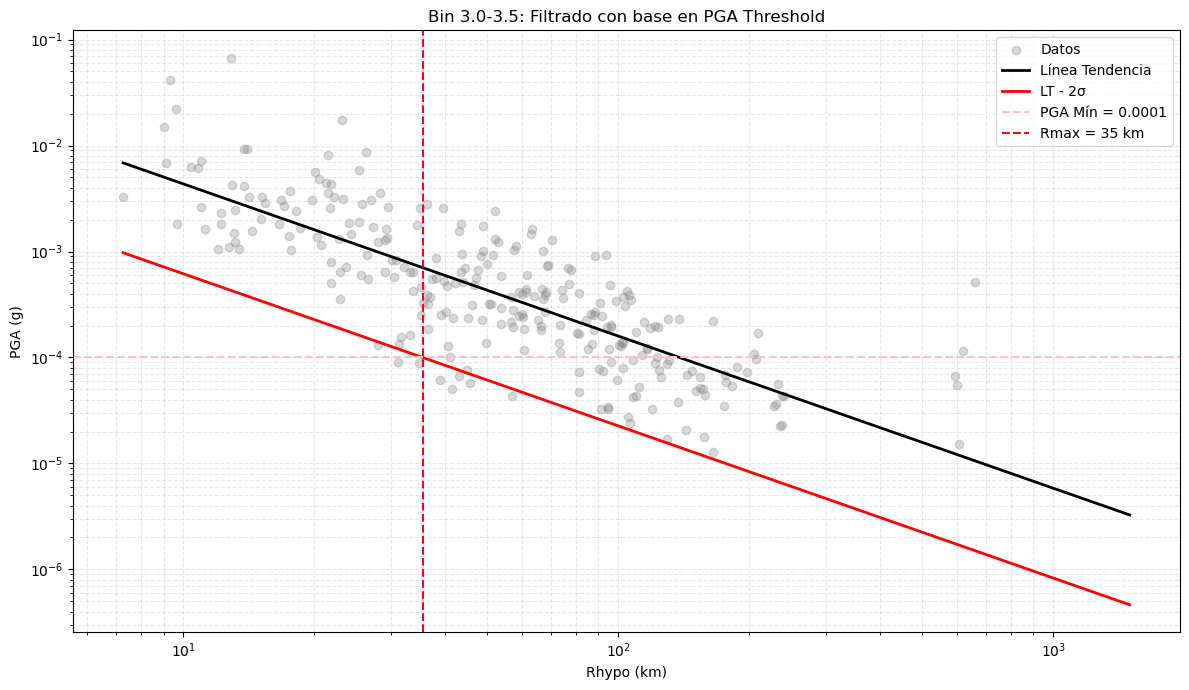

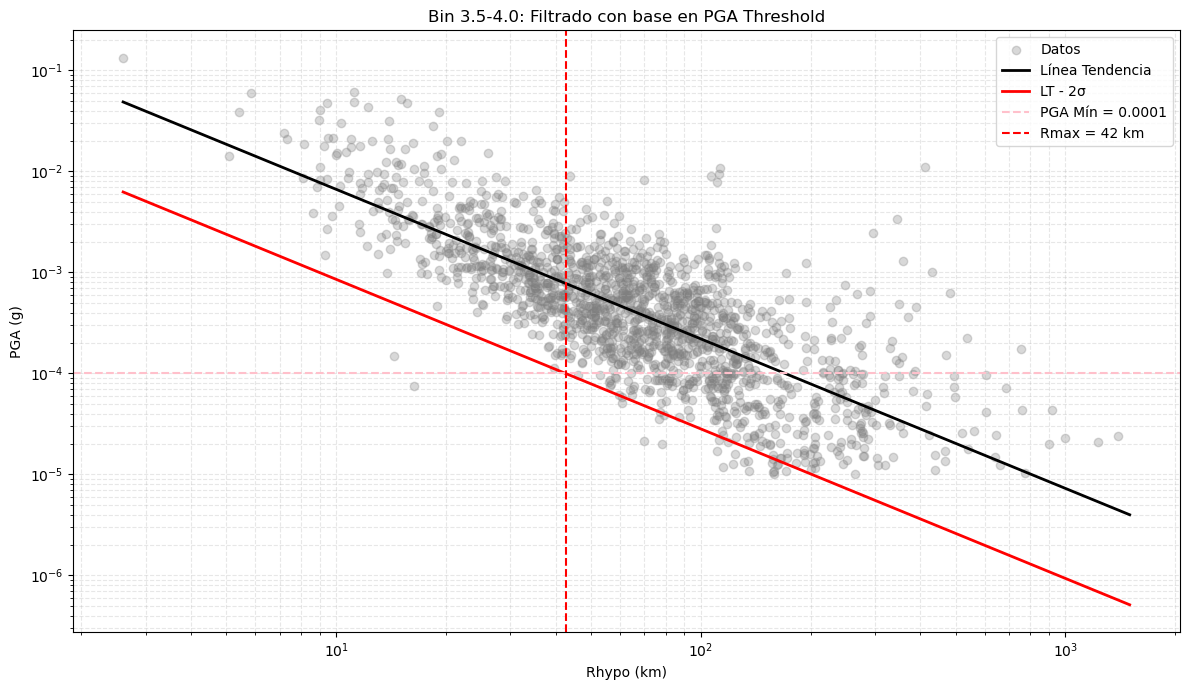

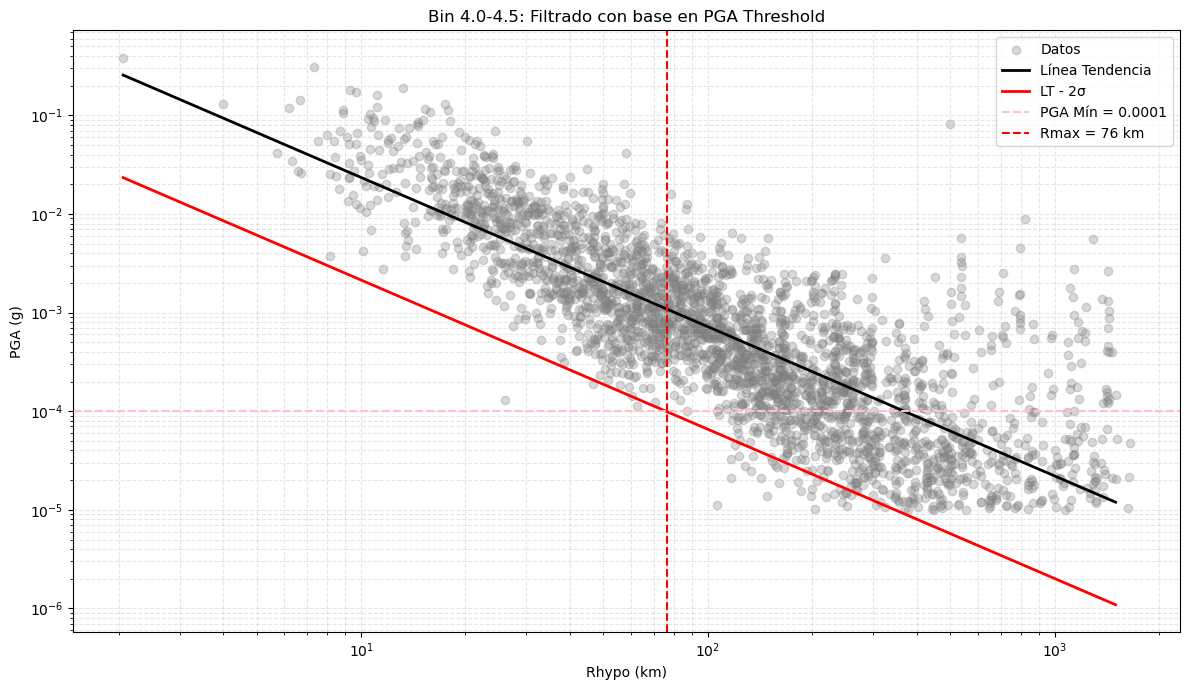

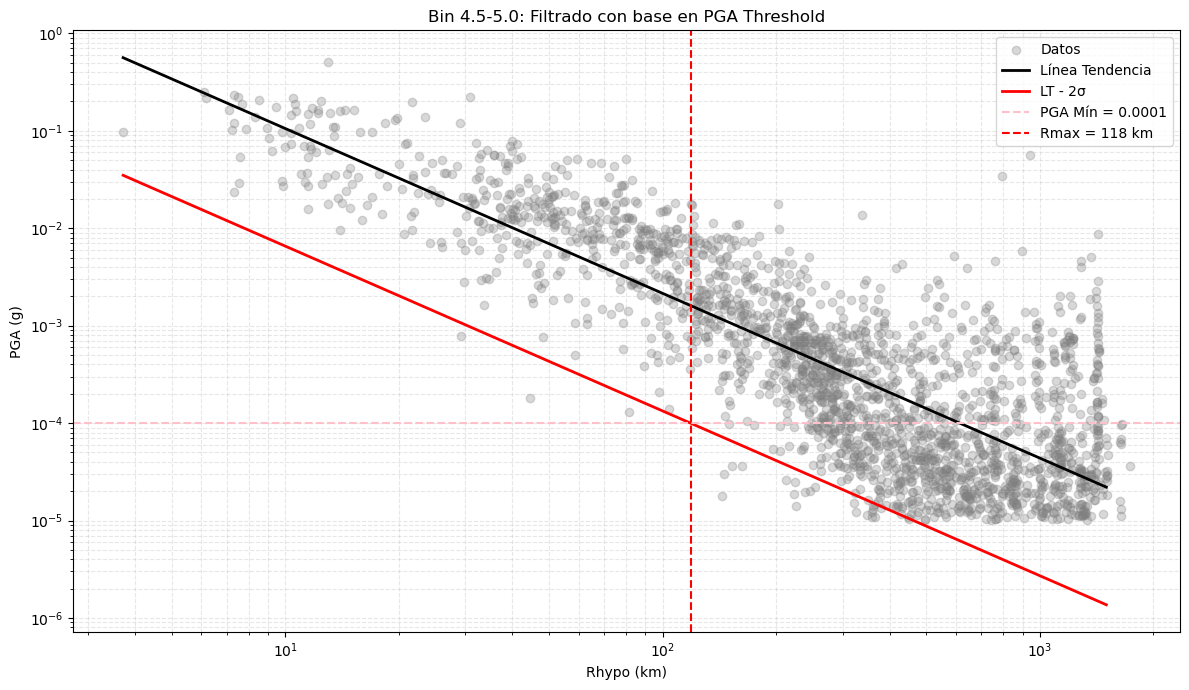

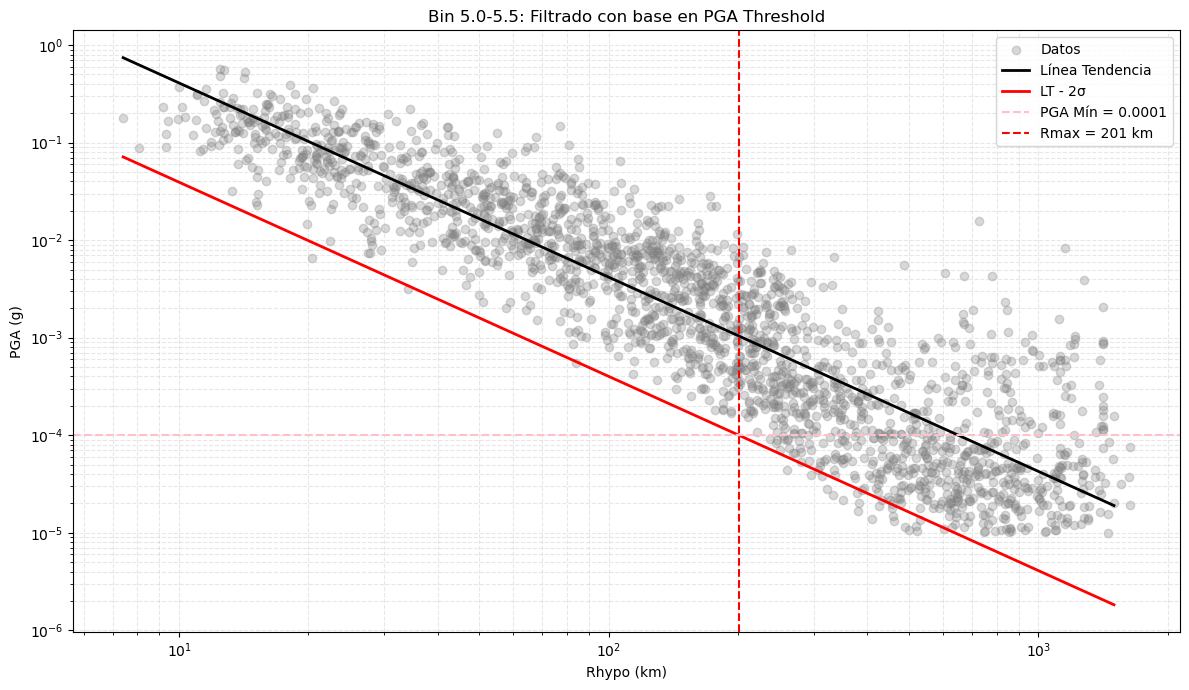

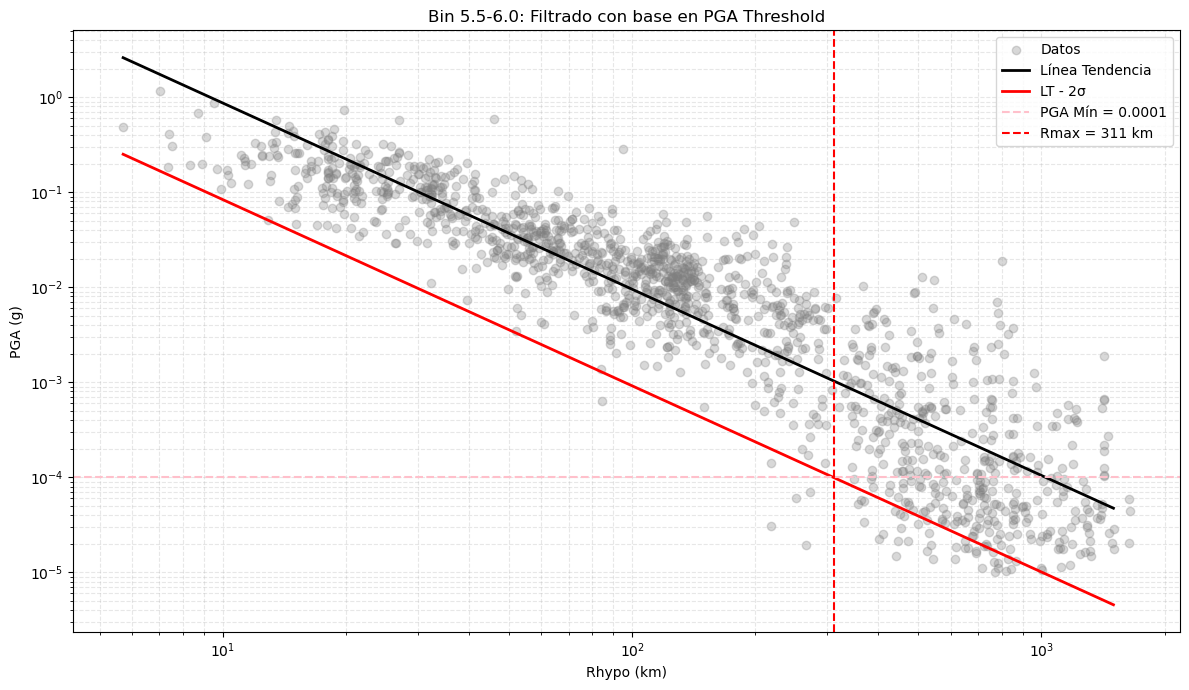

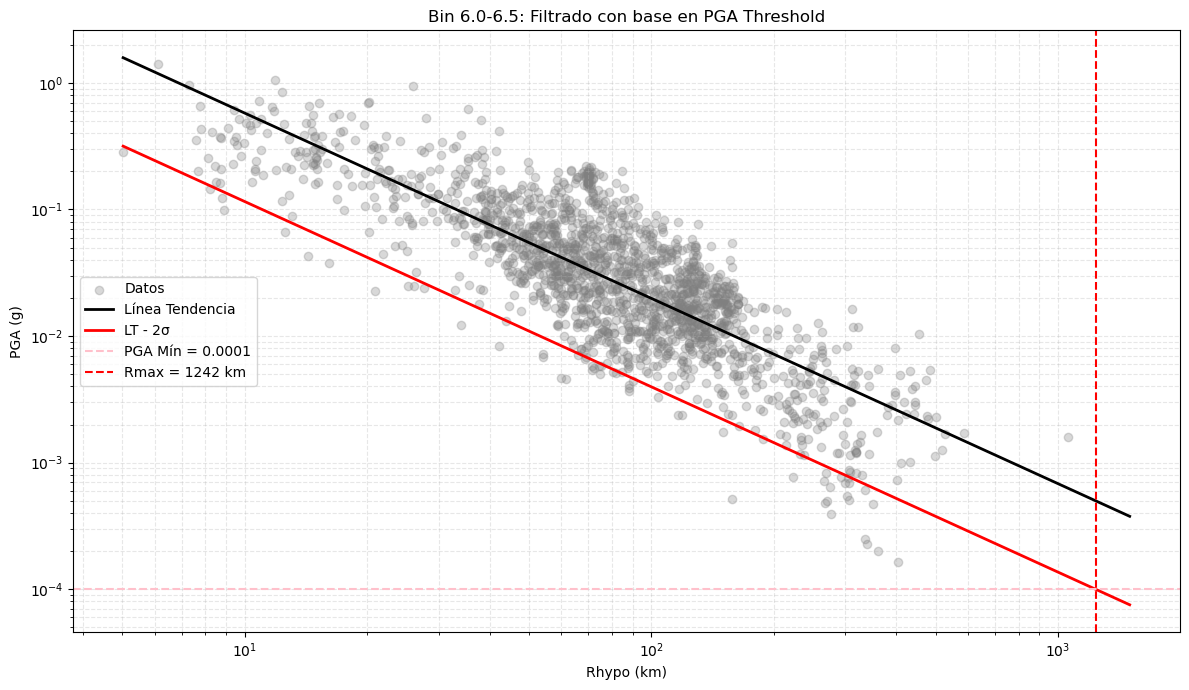

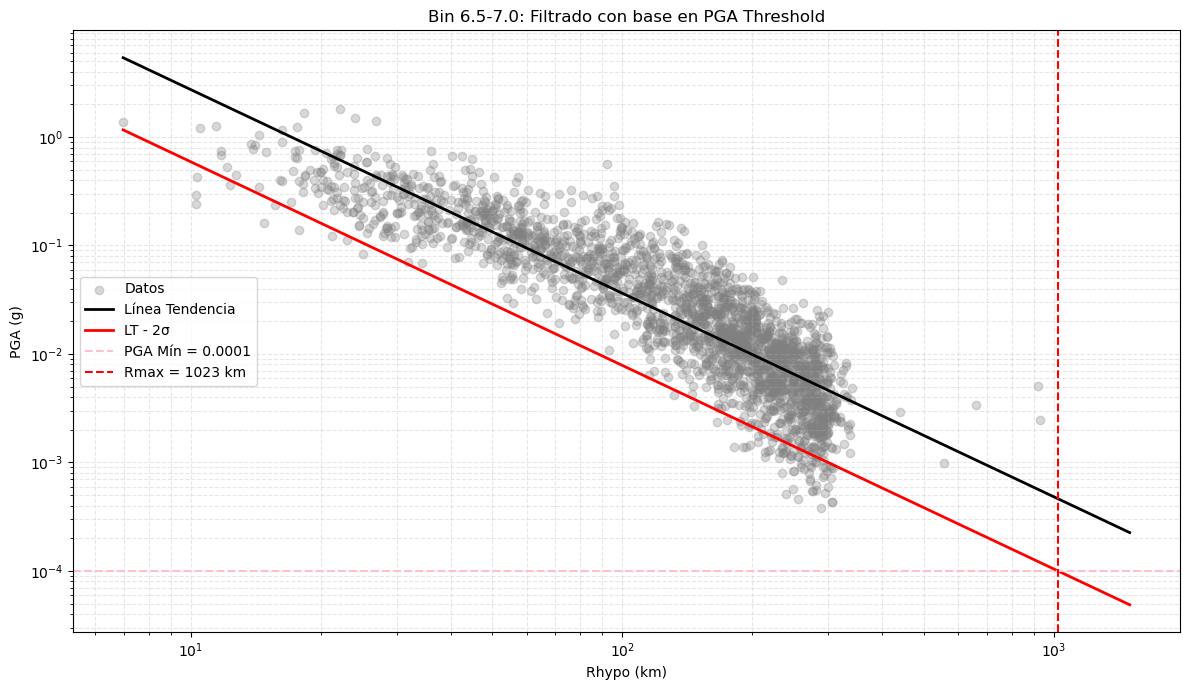

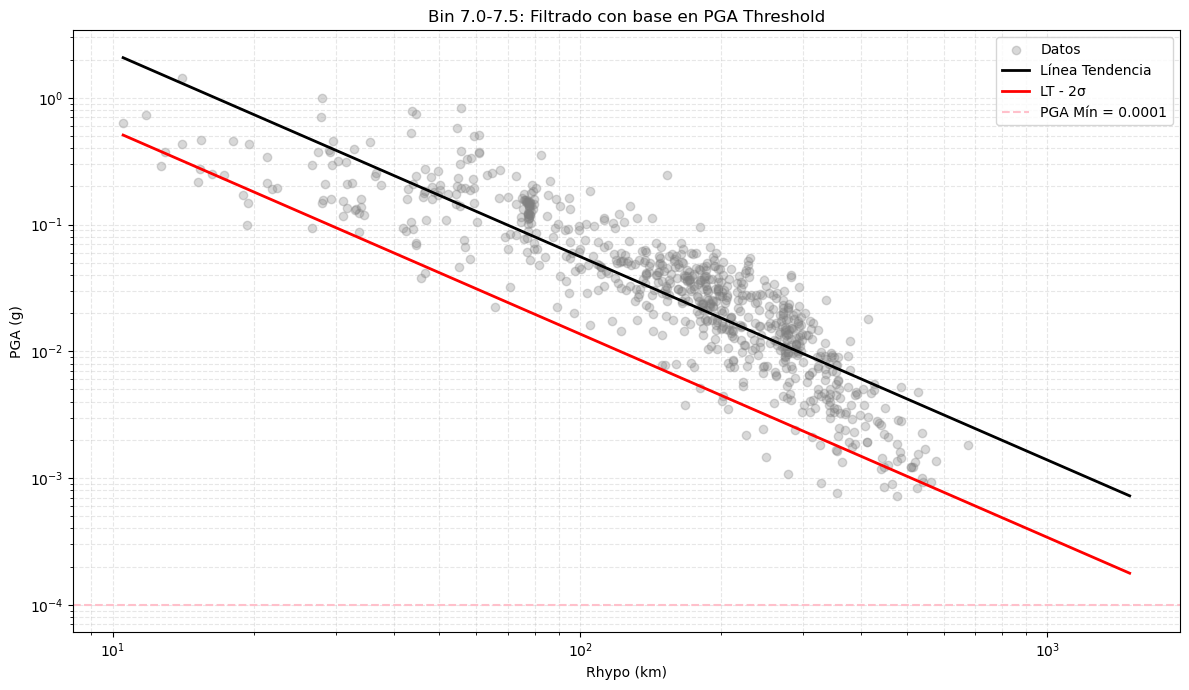

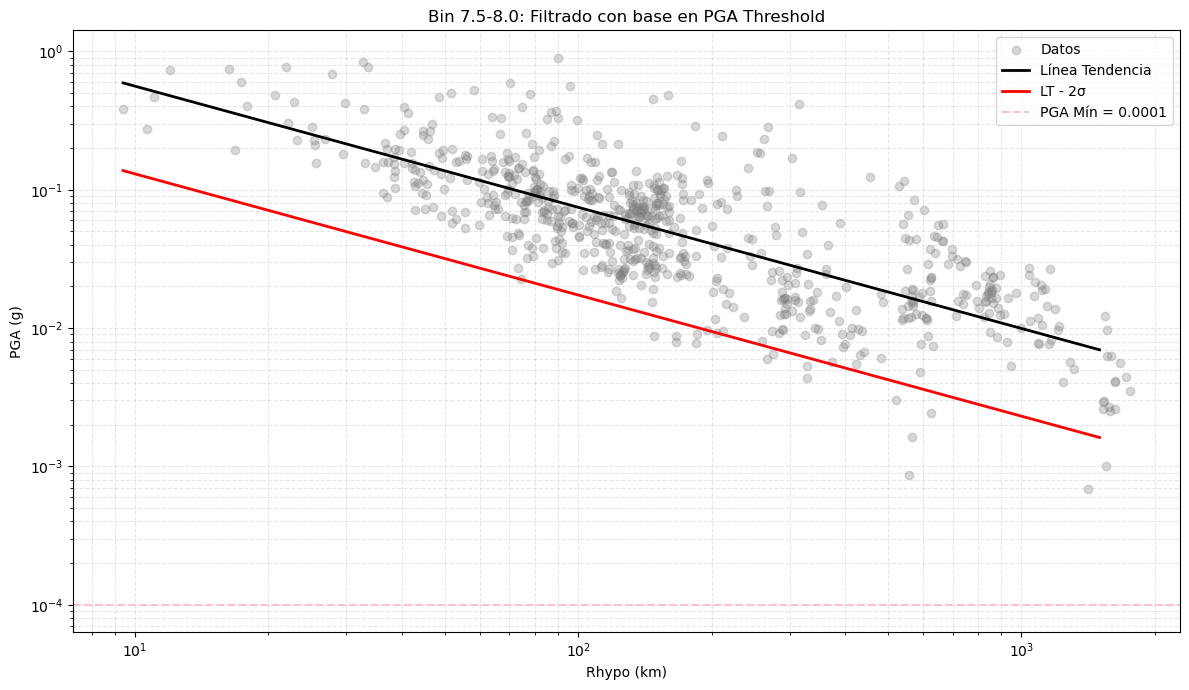

Resultados Rmax por bin:
3.0-3.5: 35.62906404860754
3.5-4.0: 42.79466013240592
4.0-4.5: 76.0450541153358
4.5-5.0: 118.97322286109743
5.0-5.5: 201.11636081673532
5.5-6.0: 311.2590138828386
6.0-6.5: 1242.5723936272595
6.5-7.0: 1023.9824377662434
7.0-7.5: None
7.5-8.0: None


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Definimos función para aplicar tu lógica
def analizar_bin(df, label, pga_min=1e-4, columna_x="Rhypo_OpenQuake", columna_y="T_0.01_RotD50"):
    x = df[columna_x]
    y = df[columna_y]
    
    # Filtrar datos sin NA y aplicar log10
    x_log = np.log10(x)
    y_log = np.log10(y)
    mask = (x_log.notna()) & (y_log.notna())
    x_log = x_log[mask].values.reshape(-1, 1)
    y_log = y_log[mask].values
    
    if len(x_log) < 10:  # evitar bins vacíos
        print(f"Bin {label} sin suficientes datos.")
        return None
    
    # Modelo de regresión lineal (log-log)
    modelo = LinearRegression()
    modelo.fit(x_log, y_log)
    
    # Línea de tendencia
    x_pred = np.logspace(np.log10(x.min()), np.log10(1500), 1000)
    x_pred_log = np.log10(x_pred).reshape(-1, 1)
    y_pred_log = modelo.predict(x_pred_log)
    
    # Desviación estándar de los residuos (hasta 20,000 km)
    residuos = y_log - modelo.predict(x_log)
    residuos_limite = residuos[x[mask].values <= 20000]
    sigma = np.std(residuos_limite)
    y_pred_log_2sigma = y_pred_log - 2 * sigma
    
    # Calcular intersección con PGA mínimo
    pga_min_log = np.log10(pga_min)
    idx_interseccion = np.where(y_pred_log_2sigma <= pga_min_log)[0]
    R_max = x_pred[idx_interseccion[0]] if len(idx_interseccion) > 0 else None
    
    # --- Gráfico ---
    plt.figure(figsize=(12, 7))
    plt.scatter(x, y, alpha=0.3, label="Datos", color='gray')
    plt.plot(x_pred, 10**y_pred_log, color='black', label="Línea Tendencia", linewidth=2)
    plt.plot(x_pred, 10**y_pred_log_2sigma, color='red', label="LT - 2σ", linewidth=2)
    plt.axhline(y=pga_min, color='pink', linestyle='--', label=f"PGA Mín = {pga_min:g}")
    
    if R_max:
        plt.axvline(x=R_max, color='red', linestyle='--', label=f"Rmax = {int(R_max)} km")
    
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Rhypo (km)")
    plt.ylabel("PGA (g)")
    plt.title(f"Bin {label}: Filtrado con base en PGA Threshold")
    plt.grid(True, which='both', linestyle='--', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return R_max

# --- Diccionario con tus dataframes ---
bins_dict = {
    "3.0-3.5": df_30_35,
    "3.5-4.0": df_35_40,
    "4.0-4.5": df_40_45,
    "4.5-5.0": df_45_50,
    "5.0-5.5": df_50_55,
    "5.5-6.0": df_55_60,
    "6.0-6.5": df_60_65,
    "6.5-7.0": df_65_70,
    "7.0-7.5": df_70_75,
    "7.5-8.0": df_75_80
}

# --- Iterar sobre todos los bins ---
Rmax_results = {}
for label, df_bin in bins_dict.items():
    Rmax_results[label] = analizar_bin(df_bin, label)

# Ver resultados
print("Resultados Rmax por bin:")
for label, rmax in Rmax_results.items():
    print(f"{label}: {rmax}")


In [23]:
# Filtrar cada bin con su respectivo Rmax
df30_35 = df_30_35[df_30_35['Rhypo_OpenQuake'] <= Rmax_results["3.0-3.5"]]
df35_40 = df_35_40[df_35_40['Rhypo_OpenQuake'] <= Rmax_results["3.5-4.0"]]
df40_45 = df_40_45[df_40_45['Rhypo_OpenQuake'] <= Rmax_results["4.0-4.5"]]
df45_50 = df_45_50[df_45_50['Rhypo_OpenQuake'] <= Rmax_results["4.5-5.0"]]
df50_55 = df_50_55[df_50_55['Rhypo_OpenQuake'] <= Rmax_results["5.0-5.5"]]
df55_60 = df_55_60[df_55_60['Rhypo_OpenQuake'] <= Rmax_results["5.5-6.0"]]
df60_65 = df_60_65[df_60_65['Rhypo_OpenQuake'] <= Rmax_results["6.0-6.5"]]
df65_70 = df_65_70[df_65_70['Rhypo_OpenQuake'] <= Rmax_results["6.5-7.0"]]
#df70_75 = df_70_75[df_70_75['Rhypo_OpenQuake'] <= Rmax_results["7.0-7.5"]]
#df75_80 = df_75_80[df_75_80['Rhypo_OpenQuake'] <= Rmax_results["7.5-8.0"]]
df70_75 = df_70_75
df75_80 = df_75_80
# Concatenar todos los bins ya filtrados
df_total2 = pd.concat(
    [df30_35, df35_40, df40_45, df45_50, df50_55,
     df55_60, df60_65, df65_70, df70_75, df75_80],
    ignore_index=True
)

# Copiar y aplicar filtro final de PGA
df_total = df_total2.copy()
df_total = df_total[df_total['T_0.01_RotD50'] > 1e-4]



In [24]:
df_total

,Hypocenter Depth (km),Magnitude,Rhypo_OpenQuake,Rrup_OpenQuake,Soil_Class,Tmax,T_0.01_RotD50,T_0.02_RotD50,T_0.03_RotD50,T_0.04_RotD50,...,T_0.75_RotD50,T_1.0_RotD50,T_1.5_RotD50,T_2.0_RotD50,T_3.0_RotD50,T_4.0_RotD50,T_5.0_RotD50,T_6.0_RotD50,T_10.0_RotD50,origen
0,7.213,3.4,12.75630,12.22,2,0.808081,0.001092,0.001078,0.001453,0.002399,...,0.000467,0.000183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NGAW2
1,7.213,3.4,27.33596,27.03,3,1.081081,0.001714,0.001696,0.001745,0.002034,...,0.000513,0.000254,0.000067,NaN,NaN,NaN,NaN,NaN,NaN,NGAW2
2,7.213,3.4,35.07003,34.85,3,1.081081,0.002577,0.002538,0.002716,0.003008,...,0.000491,0.000322,0.000082,NaN,NaN,NaN,NaN,NaN,NaN,NGAW2
3,7.213,3.4,20.55230,20.07,3,1.333333,0.004874,0.005332,0.006315,0.008871,...,0.000329,0.000171,0.000060,NaN,NaN,NaN,NaN,NaN,NaN,NGAW2
4,8.469,3.4,12.84512,12.51,3,1.666667,0.067464,0.071776,0.104458,0.115679,...,0.001890,0.001022,0.000448,0.000245,NaN,NaN,NaN,NaN,NaN,NGAW2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10241,10.040,7.9,609.00000,441.95,3,20.000000,0.011848,0.011885,0.011950,0.012048,...,0.016969,0.013162,0.011378,0.012016,0.007713,0.007323,0.009168,0.011108,0.005309,NGAW2
10242,10.040,7.9,537.99000,362.18,3,26.666667,0.013792,0.013822,0.013872,0.013959,...,0.025694,0.023990,0.015413,0.018298,0.011543,0.008223,0.008980,0.008458,0.005573,NGAW2
10243,10.040,7.9,540.10000,376.08,2,26.666667,0.011857,0.011864,0.011873,0.011891,...,0.027657,0.025381,0.019319,0.020109,0.007606,0.005916,0.006102,0.008619,0.006396,NGAW2
10244,10.040,7.9,556.05000,416.48,3,13.333333,0.011815,0.011839,0.011880,0.011948,...,0.014408,0.019274,0.011439,0.008004,0.006273,0.004877,0.004101,0.006534,0.004158,NGAW2


In [25]:
df_total.drop(columns=['Rhypo_OpenQuake'], inplace=True)

In [26]:
df_total[Sa_Crustal]=np.log(df_total[Sa_Crustal])
df_total["Rrup_OpenQuake"]=np.log(df_total["Rrup_OpenQuake"])

In [27]:

# 1) Detectar columnas de periodos
cols_T = [c for c in df_total.columns if re.match(r'^T_\d+(\.\d+)?_RotD50$', c)]

# 2) Extraer el valor del periodo de cada columna (float)
def col_to_T(c):
    # de 'T_0.01_RotD50' -> 0.01
    return float(c.split('_')[1])

periods = np.array([col_to_T(c) for c in cols_T])  # shape (nT,)

# 3) Construir máscara por-fila: True donde T > Tmax (invalidar)
Tmax = df_total['Tmax'].to_numpy().reshape(-1, 1)       # shape (n,1)
mask = periods.reshape(1, -1) > Tmax              # shape (n, nT)

# 4) Aplicar NaN solo en los inválidos (¡sin loops!)
df_total.loc[:, cols_T] = df_total.loc[:, cols_T].mask(mask)


## Modelamiento

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



In [29]:
def masked_mse(y_true, y_pred):
    """
    MSE que ignora los NaN de y_true.
    Promedia por muestra (solo sobre entradas válidas) y luego promedia el batch.
    """
    # máscara: 1 donde y_true es válido, 0 donde es NaN
    mask = tf.cast(~tf.math.is_nan(y_true), tf.float32)

    # reemplaza NaN por 0 (no afecta porque se multiplica por mask)
    y_true_f = tf.where(tf.math.is_nan(y_true), tf.zeros_like(y_true), y_true)

    # error cuadrático por elemento y enmascarado
    se = tf.square(y_pred - y_true_f) * mask

    # ejes a reducir (todos menos el batch: 0)
    reduce_axes = tf.range(1, tf.rank(y_true))

    # suma de errores y conteo de válidos por muestra
    se_sum   = tf.reduce_sum(se, axis=reduce_axes)
    n_valid  = tf.reduce_sum(mask, axis=reduce_axes)

    # MSE por muestra (evitando división por cero)
    mse_per_sample = se_sum / (n_valid + 1e-8)

    # promedio del batch
    return tf.reduce_mean(mse_per_sample)
    
def masked_mae(y_true, y_pred):
    mask = tf.cast(~tf.math.is_nan(y_true), tf.float32)
    y_true_f = tf.where(tf.math.is_nan(y_true), tf.zeros_like(y_true), y_true)
    ae = tf.abs(y_pred - y_true_f) * mask
    reduce_axes = tf.range(1, tf.rank(y_true))
    ae_sum  = tf.reduce_sum(ae, axis=reduce_axes)
    n_valid = tf.reduce_sum(mask, axis=reduce_axes)
    mae_per_sample = ae_sum / (n_valid + 1e-8)
    return tf.reduce_mean(mae_per_sample)

In [30]:
inputs = ['Magnitude', 'Rrup_OpenQuake', 'Hypocenter Depth (km)', 'Soil_Class','origen']
outputs = Sa_Crustal   

In [31]:
num_features = ['Magnitude', 'Rrup_OpenQuake', 'Hypocenter Depth (km)']
cat_features = ['Soil_Class', 'origen']

In [32]:
df_total[cat_features] = df_total[cat_features].astype(str)

In [33]:
X = df_total[inputs]
y = df_total[Sa_Crustal]

In [34]:
X_train, X_tmp, y_train, y_tmp = train_test_split(
    X, y, test_size=0.30, random_state=0, shuffle=True
)
X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.50, random_state=0, shuffle=True
)

In [35]:
num_pipe = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=True, with_std=True))
])

cat_pipe = Pipeline(steps=[
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

pre = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_features),
        ("cat", cat_pipe, cat_features)
    ],
    remainder="drop",
    sparse_threshold=0.0
)

In [36]:
X_train_feats = pre.fit_transform(X_train)
X_val_feats   = pre.transform(X_val)
X_test_feats  = pre.transform(X_test)

### Multilayers Perceptron

In [37]:
import tensorflow as tf
from tensorflow.keras import layers, callbacks, optimizers, Sequential

In [38]:
# Semilla (opcional)
tf.keras.utils.set_random_seed(42)
try:
    tf.config.experimental.enable_op_determinism()
except:
    pass

n_features = X_train_feats.shape[1]

modelMLP = Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.15),
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.15),
    layers.Dense(len(Sa_Crustal), activation=None)  # regresión
])

modelMLP.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss=masked_mse,
    metrics=[masked_mae
    #"mae","mse"
     ]
)

es  = callbacks.EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)
rlr = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=8, min_lr=1e-6)

history = modelMLP.fit(
    X_train_feats, y_train,
    validation_data=(X_val_feats, y_val),
    epochs=400,
    batch_size=64,
    callbacks=[es, rlr],
    verbose=1
)

print("Test:", modelMLP.evaluate(X_test_feats, y_test, verbose=0))
y_pred = modelMLP.predict(X_test_feats).ravel()

Epoch 1/400
112/112 [==============================] - 3s 6ms/step - loss: 16.9119 - masked_mae: 3.7303 - val_loss: 13.2846 - val_masked_mae: 3.2382 - lr: 0.0010
Epoch 2/400
112/112 [==============================] - 1s 5ms/step - loss: 5.3027 - masked_mae: 1.7537 - val_loss: 2.2477 - val_masked_mae: 1.1370 - lr: 0.0010
Epoch 3/400
112/112 [==============================] - 1s 5ms/step - loss: 1.7998 - masked_mae: 0.9859 - val_loss: 1.1870 - val_masked_mae: 0.8418 - lr: 0.0010
Epoch 4/400
112/112 [==============================] - 1s 5ms/step - loss: 1.3526 - masked_mae: 0.8848 - val_loss: 0.8553 - val_masked_mae: 0.7215 - lr: 0.0010
Epoch 5/400
112/112 [==============================] - 1s 5ms/step - loss: 1.2038 - masked_mae: 0.8452 - val_loss: 0.6345 - val_masked_mae: 0.6289 - lr: 0.0010
Epoch 6/400
112/112 [==============================] - 1s 5ms/step - loss: 1.0998 - masked_mae: 0.8117 - val_loss: 0.6328 - val_masked_mae: 0.6284 - lr: 0.0010
Epoch 7/400
112/112 [=================

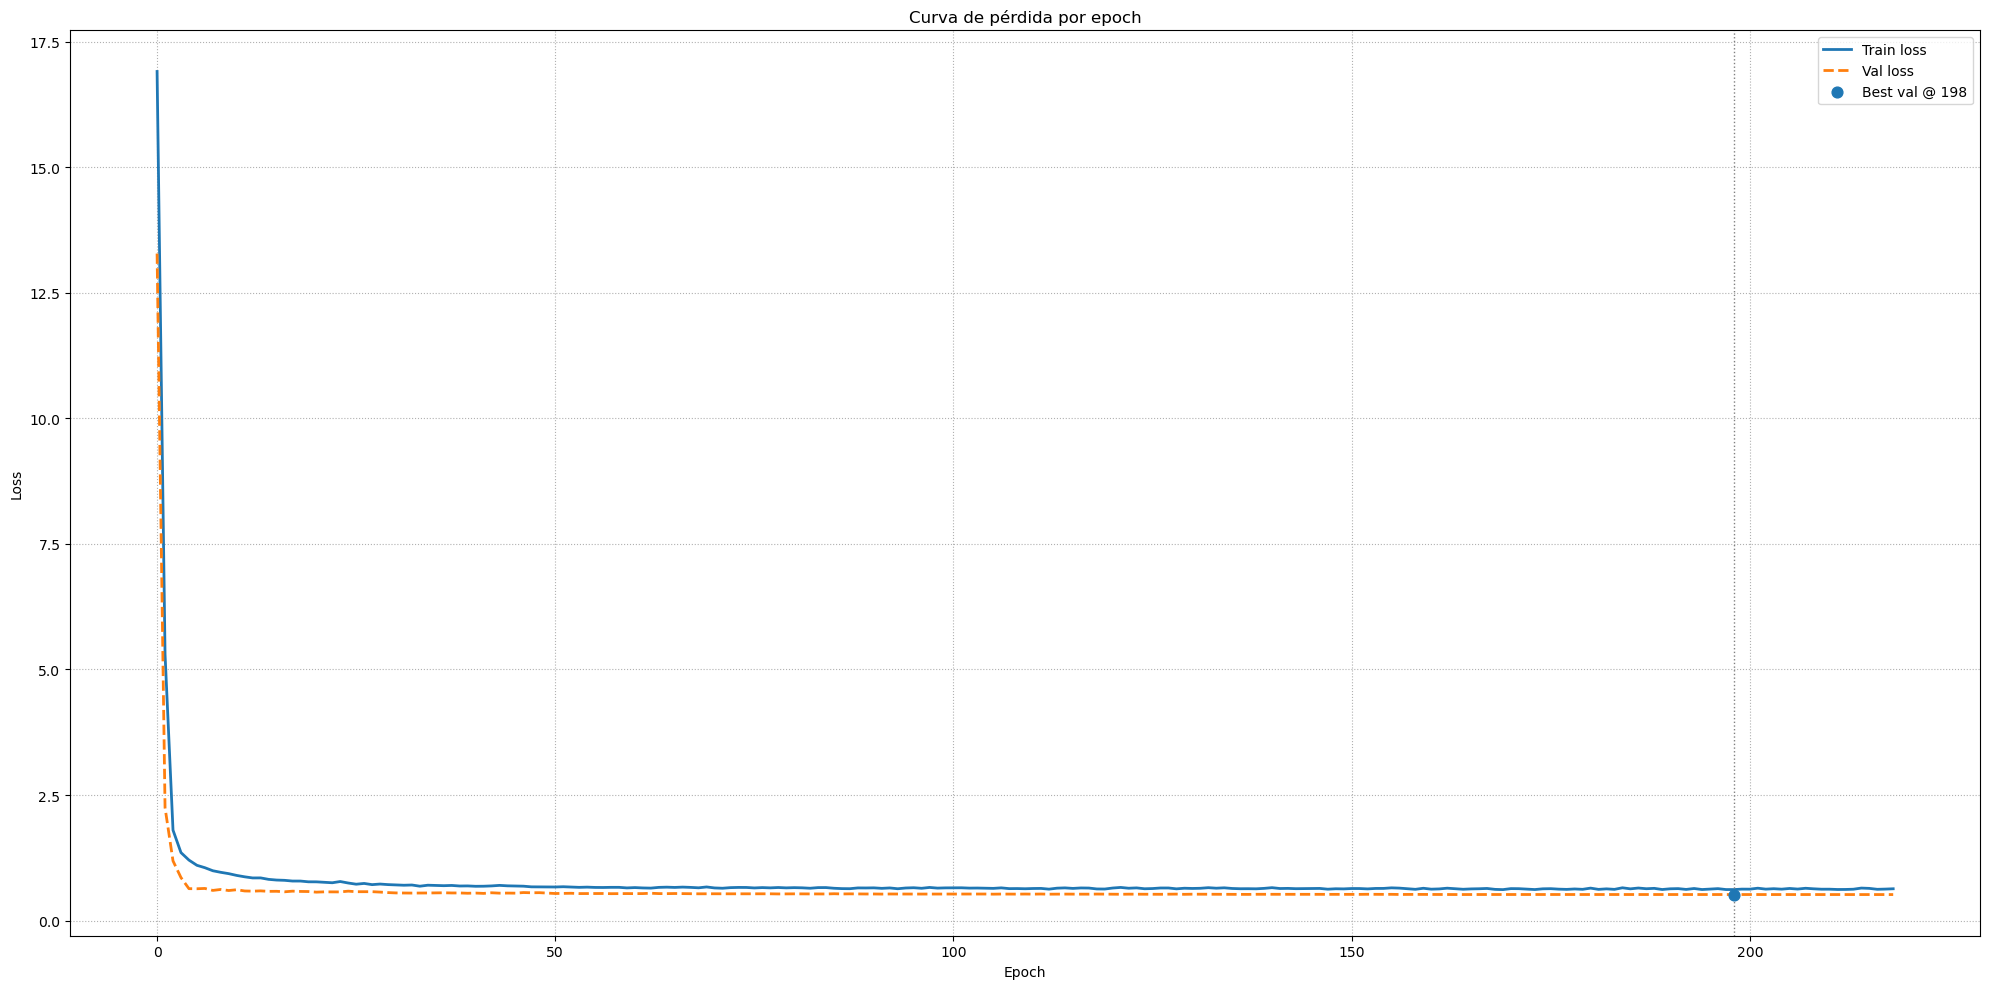

In [39]:
train_loss = history.history.get("loss", [])
val_loss   = history.history.get("val_loss", [])

plt.figure(figsize=(20,10))
plt.plot(train_loss, label="Train loss", linewidth=2)
if len(val_loss) > 0:
    plt.plot(val_loss, label="Val loss", linewidth=2, linestyle="--")
    best = int(np.argmin(val_loss))
    plt.scatter(best, val_loss[best], s=60, zorder=3, label=f"Best val @ {best}")
    plt.axvline(best, color="gray", linestyle=":", linewidth=1)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Curva de pérdida por epoch")
plt.grid(True, linestyle=":")
plt.legend()
plt.tight_layout()
plt.show()


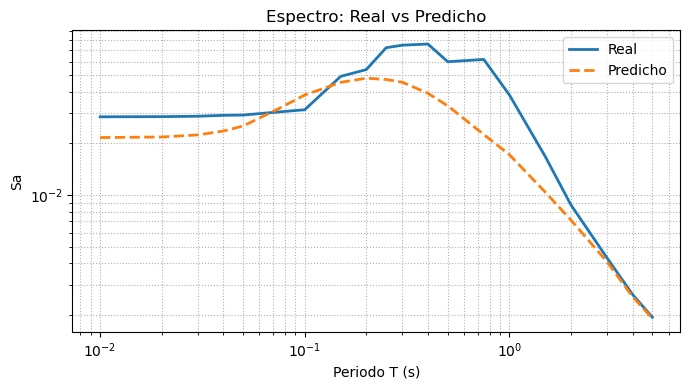

In [40]:
# --- Periodos (ya tienes el array 'periods' definido arriba) ---

# --- Elige el índice de la muestra a graficar ---
i = 10  # cámbialo por la muestra que quieras

# --- Espectros real y predicho (forma (nT,)) ---
y_true_spec = y_test.iloc[i].values       # espectro real (array)
y_pred_spec = y_pred[i] if y_pred.ndim == 2 else y_pred.reshape(-1, len(periods))[i]  # espectro predicho

# --- Opcional: ignora NaNs del real para comparar sobre los válidos ---
mask = ~np.isnan(y_true_spec)
T = periods[mask]
y_real = y_true_spec[mask]
y_hat  = y_pred_spec[mask]

plt.figure(figsize=(7,4))
plt.plot(T, np.exp(y_real), label="Real", linewidth=2)
plt.plot(T, np.exp(y_hat), label="Predicho", linewidth=2, linestyle="--")
# Si prefieres escala log en T o Sa, descomenta:
plt.xscale("log"); plt.yscale("log")

plt.xlabel("Periodo T (s)")
plt.ylabel("Sa")
plt.title("Espectro: Real vs Predicho")
plt.grid(True, which="both", linestyle=":")
plt.legend()
plt.tight_layout()
plt.show()


In [42]:
# --- Estandariza a numpy 2D ---
Y_tr = np.asarray(y_train, dtype=float)
Y_va = np.asarray(y_val,   dtype=float)
Y_te = np.asarray(y_test,  dtype=float)

y_pred_train = np.asarray(modelMLP.predict(X_train_feats))
y_pred_val   = np.asarray(modelMLP.predict(X_val_feats))
y_pred_test  = np.asarray(modelMLP.predict(X_test_feats))

# Asegura 2D (n, nY)
if Y_tr.ndim == 1: Y_tr = Y_tr.reshape(-1,1)
if Y_va.ndim == 1: Y_va = Y_va.reshape(-1,1)
if Y_te.ndim == 1: Y_te = Y_te.reshape(-1,1)
if y_pred_train.ndim == 1: y_pred_train = y_pred_train.reshape(-1,1)
if y_pred_val.ndim   == 1: y_pred_val   = y_pred_val.reshape(-1,1)
if y_pred_test.ndim  == 1: y_pred_test  = y_pred_test.reshape(-1,1)
if y_pred_train.ndim == 3 and y_pred_train.shape[-1] == 1: y_pred_train = y_pred_train[...,0]
if y_pred_val.ndim   == 3 and y_pred_val.shape[-1]   == 1: y_pred_val   = y_pred_val[...,0]
if y_pred_test.ndim  == 3 and y_pred_test.shape[-1]  == 1: y_pred_test  = y_pred_test[...,0]

nY = Y_te.shape[1]

# --- Nombres de salidas ---
try:
    y_names = list(cols_T)            # si ya definiste tus columnas de periodos
    if len(y_names) != nY:
        y_names = [f"Y_{j}" for j in range(nY)]
except NameError:
    y_names = [f"Y_{j}" for j in range(nY)]

# ========== 1) MÉTRICAS POR Y (TEST) ==========
rows_test = []
for j, name in enumerate(y_names):
    y_t = Y_te[:, j]
    y_p = y_pred_test[:, j]
    mask_valid = np.isfinite(y_t) & np.isfinite(y_p)

    if mask_valid.sum() == 0:
        mse = rmse = mae = mape = r2 = np.nan
    else:
        err  = y_p[mask_valid] - y_t[mask_valid]
        mse  = np.mean(err**2)
        rmse = np.sqrt(mse)
        mae  = np.mean(np.abs(err))
        mask_mape = (np.abs(y_t) > 1e-12) & mask_valid
        mape = np.mean(np.abs((y_p[mask_mape] - y_t[mask_mape]) / y_t[mask_mape])) * 100.0 if mask_mape.sum() else np.nan
        y_mean = np.mean(y_t[mask_valid])
        ss_res = np.sum((y_t[mask_valid] - y_p[mask_valid])**2)
        ss_tot = np.sum((y_t[mask_valid] - y_mean)**2)
        r2 = 1.0 - ss_res / (ss_tot + 1e-12)

    rows_test.append({"Y": name, "RMSE": rmse, "MSE": mse, "MAE": mae, "MAPE_%": mape, "R2": r2})

df_test_metrics_mlp = pd.DataFrame(rows_test).set_index("Y").sort_index()
df_test_metrics_mlp


48/48 [==============================] - 0s 1ms/step


,RMSE,MSE,MAE,MAPE_%,R2
Y,,,,,
T_0.01_RotD50,0.684758,0.468893,0.537110,18.109019,0.835116
T_0.02_RotD50,0.686196,0.470865,0.538204,17.916736,0.835043
T_0.03_RotD50,0.691316,0.477917,0.541960,18.270892,0.833900
T_0.04_RotD50,0.698310,0.487637,0.548020,21.892617,0.831384
T_0.05_RotD50,0.706074,0.498541,0.554990,22.631392,0.829409
T_0.075_RotD50,0.742196,0.550855,0.583651,29.781594,0.814543
T_0.15_RotD50,0.746069,0.556619,0.584840,46.451428,0.811688
T_0.1_RotD50,0.756594,0.572434,0.596513,36.136265,0.807420
T_0.25_RotD50,0.739717,0.547181,0.590069,62.434056,0.816187


In [43]:
# ========== 2) TRES DATAFRAMES: TRAIN / VAL / TEST ==========
rows_train, rows_val, rows_test = [], [], []

for split_name, Y_true, Y_pred, rows_container in [
    ("train", Y_tr, y_pred_train, rows_train),
    ("val",   Y_va, y_pred_val,   rows_val),
    ("test",  Y_te, y_pred_test,  rows_test),
]:
    for j, name in enumerate(y_names):
        y_t = Y_true[:, j]
        y_p = Y_pred[:, j]
        mask_valid = np.isfinite(y_t) & np.isfinite(y_p)
        if mask_valid.sum() == 0:
            mse = rmse = mae = mape = r2 = np.nan
        else:
            err  = y_p[mask_valid] - y_t[mask_valid]
            mse  = np.mean(err**2)
            rmse = np.sqrt(mse)
            mae  = np.mean(np.abs(err))
            mask_mape = (np.abs(y_t) > 1e-12) & mask_valid
            mape = np.mean(np.abs((y_p[mask_mape] - y_t[mask_mape]) / y_t[mask_mape])) * 100.0 if mask_mape.sum() else np.nan
            y_mean = np.mean(y_t[mask_valid])
            ss_res = np.sum((y_t[mask_valid] - y_p[mask_valid])**2)
            ss_tot = np.sum((y_t[mask_valid] - y_mean)**2)
            r2 = 1.0 - ss_res / (ss_tot + 1e-12)
        rows_container.append({"Y": name, "RMSE": rmse, "MSE": mse, "MAE": mae, "MAPE_%": mape, "R2": r2})

df_train_metrics_mlp = pd.DataFrame(rows_train).set_index("Y").sort_index()
df_val_metrics_mlp   = pd.DataFrame(rows_val).set_index("Y").sort_index()
df_test_metrics_mlp  = pd.DataFrame(rows_test).set_index("Y").sort_index()


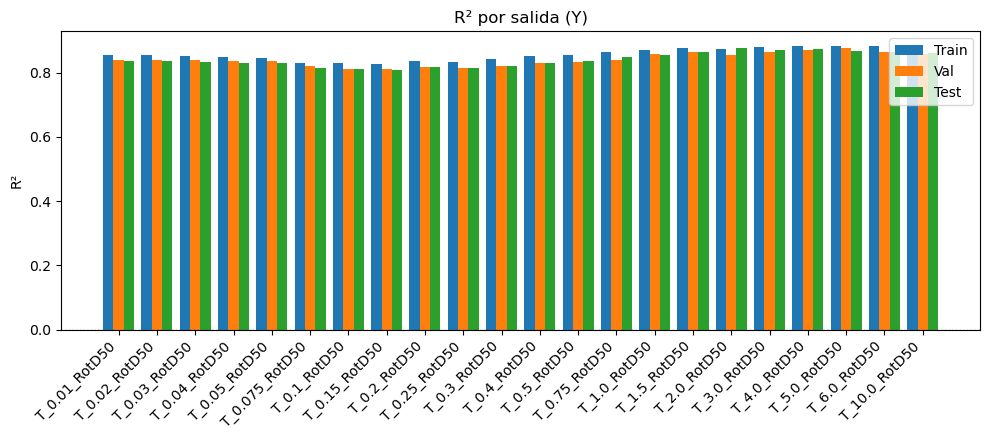

In [44]:
# ========== 3) BARRAS DE R2 POR Y (TRAIN / VAL / TEST) ==========
import matplotlib.pyplot as plt

ys = np.array(y_names)
x = np.arange(len(ys))
w = 0.27

plt.figure(figsize=(10, 4.5))
plt.bar(x - w, df_train_metrics_mlp["R2"].values, width=w, label="Train")
plt.bar(x,      df_val_metrics_mlp["R2"].values,   width=w, label="Val")
plt.bar(x + w,  df_test_metrics_mlp["R2"].values,  width=w, label="Test")
plt.axhline(0.0, linestyle=":", linewidth=1)

plt.xticks(x, ys, rotation=45, ha="right")
plt.ylabel("R²")
plt.title("R² por salida (Y)")
plt.legend()
plt.tight_layout()
plt.show()


### Redes Convolucionales de 1 dimensión

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, callbacks, optimizers, Model, Input

In [46]:
# --- datos ---
Xtr = np.asarray(X_train_feats, dtype="float32")
Xva = np.asarray(X_val_feats,   dtype="float32")
Xte = np.asarray(X_test_feats,  dtype="float32")

Ytr = np.asarray(y_train, dtype="float32")
Yva = np.asarray(y_val,   dtype="float32")
Yte = np.asarray(y_test,  dtype="float32")
if Ytr.ndim == 1: Ytr = Ytr.reshape(-1,1)
if Yva.ndim == 1: Yva = Yva.reshape(-1,1)
if Yte.ndim == 1: Yte = Yte.reshape(-1,1)

n_features = Xtr.shape[1]
nT = Ytr.shape[1]

# --- reshape para Conv1D ---
Xtr_cnn = Xtr.reshape((-1, n_features, 1))
Xva_cnn = Xva.reshape((-1, n_features, 1))
Xte_cnn = Xte.reshape((-1, n_features, 1))

In [47]:
# --- modelo CNN ---
tf.keras.utils.set_random_seed(42)
try: tf.config.experimental.enable_op_determinism()
except: pass

inp = Input(shape=(n_features, 1))
x = layers.Conv1D(64, 3, padding="same", activation="relu")(inp)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.15)(x)
x = layers.Conv1D(128, 3, padding="same", activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.15)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.10)(x)
out = layers.Dense(nT, activation=None)(x)

modelCNN = Model(inp, out)
modelCNN.compile(optimizer=optimizers.Adam(1e-3), loss=masked_mse)

es  = callbacks.EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)
rlr = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=8, min_lr=1e-6)

history = modelCNN.fit(
    Xtr_cnn, Ytr,
    validation_data=(Xva_cnn, Yva),
    epochs=400, batch_size=64,
    callbacks=[es, rlr], verbose=1
)

print("Test loss:", modelCNN.evaluate(Xte_cnn, Yte, verbose=0))
y_pred_test = modelCNN.predict(Xte_cnn)  # (n_samples, nT)

Epoch 1/400
112/112 [==============================] - 5s 11ms/step - loss: 5.2640 - val_loss: 3.4180 - lr: 0.0010
Epoch 2/400
112/112 [==============================] - 1s 8ms/step - loss: 1.2628 - val_loss: 18.7672 - lr: 0.0010
Epoch 3/400
112/112 [==============================] - 1s 7ms/step - loss: 1.0334 - val_loss: 14.4555 - lr: 0.0010
Epoch 4/400
112/112 [==============================] - 1s 7ms/step - loss: 0.9442 - val_loss: 7.0521 - lr: 0.0010
Epoch 5/400
112/112 [==============================] - 1s 7ms/step - loss: 0.9270 - val_loss: 1.8728 - lr: 0.0010
Epoch 6/400
112/112 [==============================] - 1s 7ms/step - loss: 0.9081 - val_loss: 1.1879 - lr: 0.0010
Epoch 7/400
112/112 [==============================] - 1s 6ms/step - loss: 0.8971 - val_loss: 0.6480 - lr: 0.0010
Epoch 8/400
112/112 [==============================] - 1s 6ms/step - loss: 0.8518 - val_loss: 0.7114 - lr: 0.0010
Epoch 9/400
112/112 [==============================] - 1s 6ms/step - loss: 0.8379 - v

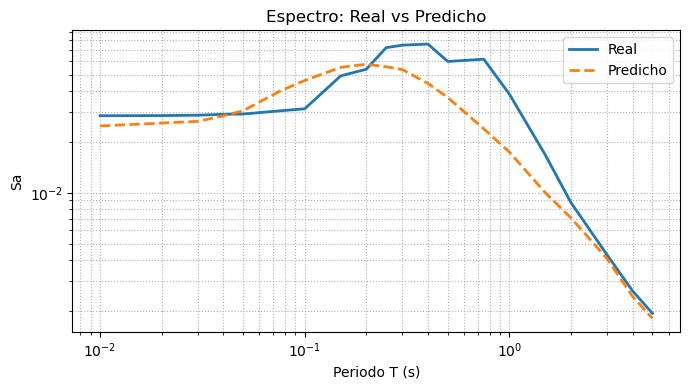

In [48]:
# --- Periodos (ya tienes el array 'periods' definido arriba) ---

# --- Elige el índice de la muestra a graficar ---
i = 10  # cámbialo por la muestra que quieras

# --- Espectros real y predicho (forma (nT,)) ---
y_true_spec = y_test.iloc[i].values       # espectro real (array)
y_pred_spec = y_pred_test[i] if y_pred_test.ndim == 2 else y_pred_test.reshape(-1, len(periods))[i]  # espectro predicho

# --- Opcional: ignora NaNs del real para comparar sobre los válidos ---
mask = ~np.isnan(y_true_spec)
T = periods[mask]
y_real = y_true_spec[mask]
y_hat  = y_pred_spec[mask]

plt.figure(figsize=(7,4))
plt.plot(T, np.exp(y_real), label="Real", linewidth=2)
plt.plot(T, np.exp(y_hat), label="Predicho", linewidth=2, linestyle="--")
# Si prefieres escala log en T o Sa, descomenta:
plt.xscale("log"); plt.yscale("log")

plt.xlabel("Periodo T (s)")
plt.ylabel("Sa")
plt.title("Espectro: Real vs Predicho")
plt.grid(True, which="both", linestyle=":")
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
# Predicciones (asegúrate de haber entrenado modelCNN)
y_pred_test = modelCNN.predict(Xte_cnn)

# Asegurar forma 2D
Y_te = np.asarray(Yte, dtype=float)
if Y_te.ndim == 1: Y_te = Y_te.reshape(-1, 1)
if y_pred_test.ndim == 1: y_pred_test = y_pred_test.reshape(-1, 1)
if y_pred_test.ndim == 3 and y_pred_test.shape[-1] == 1: y_pred_test = y_pred_test[..., 0]

# Nombres de salidas (usa tu lista Sa_Crustal)
y_names = list(Sa_Crustal)
if len(y_names) != Y_te.shape[1]:
    y_names = [f"Y_{j}" for j in range(Y_te.shape[1])]

# Si entrenaste en log(Sa) y quieres métricas en escala original, pon True
EXP_BACKTRANS = False  # cámbialo a True si tus Y están en log y quieres exponenciar

Y_te_eval  = np.exp(Y_te) if EXP_BACKTRANS else Y_te
Yp_te_eval = np.exp(y_pred_test) if EXP_BACKTRANS else y_pred_test

rows_test = []
for j, name in enumerate(y_names):
    y_t = Y_te_eval[:, j]
    y_p = Yp_te_eval[:, j]
    mask = np.isfinite(y_t) & np.isfinite(y_p)
    if mask.sum() == 0:
        mse = rmse = mae = mape = r2 = np.nan
    else:
        err  = y_p[mask] - y_t[mask]
        mse  = np.mean(err**2)
        rmse = np.sqrt(mse)
        mae  = np.mean(np.abs(err))
        mask_mape = (np.abs(y_t) > 1e-12) & mask
        mape = np.mean(np.abs((y_p[mask_mape] - y_t[mask_mape]) / y_t[mask_mape])) * 100.0 if mask_mape.sum() else np.nan
        y_mean = np.mean(y_t[mask])
        ss_res = np.sum((y_t[mask] - y_p[mask])**2)
        ss_tot = np.sum((y_t[mask] - y_mean)**2)
        r2 = 1.0 - ss_res / (ss_tot + 1e-12)
    rows_test.append({"Y": name, "RMSE": rmse, "MSE": mse, "MAE": mae, "MAPE_%": mape, "R2": r2})

df_test_metrics_cnn = pd.DataFrame(rows_test).set_index("Y").sort_index()
df_test_metrics_cnn

48/48 [==============================] - 0s 2ms/step


,RMSE,MSE,MAE,MAPE_%,R2
Y,,,,,
T_0.01_RotD50,0.698014,0.487223,0.544837,17.551971,0.828670
T_0.02_RotD50,0.698728,0.488221,0.544655,17.320108,0.828962
T_0.03_RotD50,0.702472,0.493467,0.547161,17.465494,0.828496
T_0.04_RotD50,0.708810,0.502412,0.553380,19.974523,0.826275
T_0.05_RotD50,0.716266,0.513038,0.559582,20.427860,0.824448
T_0.075_RotD50,0.752956,0.566942,0.588492,25.948232,0.809127
T_0.15_RotD50,0.757093,0.573190,0.590261,49.490234,0.806082
T_0.1_RotD50,0.769231,0.591716,0.599470,31.823007,0.800933
T_0.25_RotD50,0.746861,0.557801,0.592146,41.075494,0.812619


In [50]:
# ====== BLOQUE 2: Tres DataFrames de métricas (TRAIN / VAL / TEST) ======
# Predicciones
y_pred_train = modelCNN.predict(Xtr_cnn)
y_pred_val   = modelCNN.predict(Xva_cnn)

# Asegurar 2D
Y_tr = np.asarray(Ytr, dtype=float);  Y_va = np.asarray(Yva, dtype=float);  Y_te = np.asarray(Yte, dtype=float)
for arr_name in ["Y_tr","Y_va","Y_te"]:
    arr = locals()[arr_name]
    if arr.ndim == 1: locals()[arr_name] = arr.reshape(-1,1)

for pred_name in ["y_pred_train","y_pred_val","y_pred_test"]:
    arr = locals()[pred_name]
    if arr.ndim == 1: locals()[pred_name] = arr.reshape(-1,1)
    if arr.ndim == 3 and arr.shape[-1] == 1: locals()[pred_name] = arr[...,0]

# Backtransform opcional
Y_tr_eval  = np.exp(Y_tr)       if EXP_BACKTRANS else Y_tr
Y_va_eval  = np.exp(Y_va)       if EXP_BACKTRANS else Y_va
Y_te_eval  = np.exp(Y_te)       if EXP_BACKTRANS else Y_te
Yp_tr_eval = np.exp(y_pred_train) if EXP_BACKTRANS else y_pred_train
Yp_va_eval = np.exp(y_pred_val)   if EXP_BACKTRANS else y_pred_val
Yp_te_eval = np.exp(y_pred_test)  if EXP_BACKTRANS else y_pred_test

# TRAIN
rows_train = []
for j, name in enumerate(y_names):
    y_t = Y_tr_eval[:, j]; y_p = Yp_tr_eval[:, j]
    mask = np.isfinite(y_t) & np.isfinite(y_p)
    if mask.sum() == 0:
        mse = rmse = mae = mape = r2 = np.nan
    else:
        err  = y_p[mask] - y_t[mask]
        mse  = np.mean(err**2); rmse = np.sqrt(mse); mae  = np.mean(np.abs(err))
        mask_mape = (np.abs(y_t) > 1e-12) & mask
        mape = np.mean(np.abs((y_p[mask_mape] - y_t[mask_mape]) / y_t[mask_mape])) * 100.0 if mask_mape.sum() else np.nan
        y_mean = np.mean(y_t[mask]); ss_res = np.sum((y_t[mask] - y_p[mask])**2); ss_tot = np.sum((y_t[mask] - y_mean)**2)
        r2 = 1.0 - ss_res / (ss_tot + 1e-12)
    rows_train.append({"Y": name, "RMSE": rmse, "MSE": mse, "MAE": mae, "MAPE_%": mape, "R2": r2})
df_train_metrics_cnn = pd.DataFrame(rows_train).set_index("Y").sort_index()

# VAL
rows_val = []
for j, name in enumerate(y_names):
    y_t = Y_va_eval[:, j]; y_p = Yp_va_eval[:, j]
    mask = np.isfinite(y_t) & np.isfinite(y_p)
    if mask.sum() == 0:
        mse = rmse = mae = mape = r2 = np.nan
    else:
        err  = y_p[mask] - y_t[mask]
        mse  = np.mean(err**2); rmse = np.sqrt(mse); mae  = np.mean(np.abs(err))
        mask_mape = (np.abs(y_t) > 1e-12) & mask
        mape = np.mean(np.abs((y_p[mask_mape] - y_t[mask_mape]) / y_t[mask_mape])) * 100.0 if mask_mape.sum() else np.nan
        y_mean = np.mean(y_t[mask]); ss_res = np.sum((y_t[mask] - y_p[mask])**2); ss_tot = np.sum((y_t[mask] - y_mean)**2)
        r2 = 1.0 - ss_res / (ss_tot + 1e-12)
    rows_val.append({"Y": name, "RMSE": rmse, "MSE": mse, "MAE": mae, "MAPE_%": mape, "R2": r2})
df_val_metrics_cnn = pd.DataFrame(rows_val).set_index("Y").sort_index()

# TEST (reusamos lo calculado arriba si quieres, aquí lo volvemos a generar por claridad)
rows_test = []
for j, name in enumerate(y_names):
    y_t = Y_te_eval[:, j]; y_p = Yp_te_eval[:, j]
    mask = np.isfinite(y_t) & np.isfinite(y_p)
    if mask.sum() == 0:
        mse = rmse = mae = mape = r2 = np.nan
    else:
        err  = y_p[mask] - y_t[mask]
        mse  = np.mean(err**2); rmse = np.sqrt(mse); mae  = np.mean(np.abs(err))
        mask_mape = (np.abs(y_t) > 1e-12) & mask
        mape = np.mean(np.abs((y_p[mask_mape] - y_t[mask_mape]) / y_t[mask_mape])) * 100.0 if mask_mape.sum() else np.nan
        y_mean = np.mean(y_t[mask]); ss_res = np.sum((y_t[mask] - y_p[mask])**2); ss_tot = np.sum((y_t[mask] - y_mean)**2)
        r2 = 1.0 - ss_res / (ss_tot + 1e-12)
    rows_test.append({"Y": name, "RMSE": rmse, "MSE": mse, "MAE": mae, "MAPE_%": mape, "R2": r2})
df_test_metrics_cnn = pd.DataFrame(rows_test).set_index("Y").sort_index()



48/48 [==============================] - 0s 2ms/step


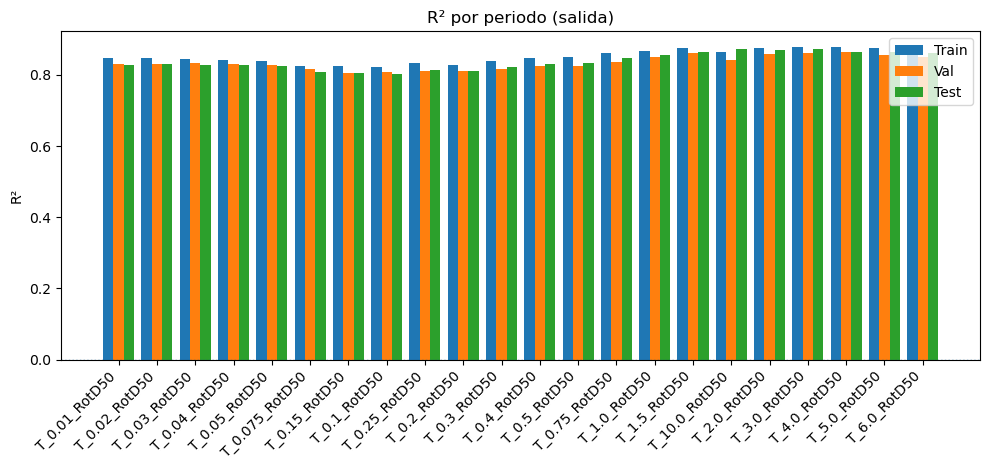

In [51]:
ys = np.array(df_test_metrics_cnn.index.tolist())
x = np.arange(len(ys))
w = 0.27

plt.figure(figsize=(10, 4.8))
plt.bar(x - w, df_train_metrics_cnn["R2"].values, width=w, label="Train")
plt.bar(x,      df_val_metrics_cnn["R2"].values,   width=w, label="Val")
plt.bar(x + w,  df_test_metrics_cnn["R2"].values,  width=w, label="Test")
plt.axhline(0.0, linestyle=":", linewidth=1)

plt.xticks(x, ys, rotation=45, ha="right")
plt.ylabel("R²")
plt.title("R² por periodo (salida)")
plt.legend()
plt.tight_layout()
plt.show()

### Redes Recurrentes

#### Recurrente simple

In [52]:
# ====== BLOQUE 1: RNN (GRU/LSTM) para regresión multi-salida ======
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, callbacks, optimizers, Model, Input

In [53]:
# Datos a numpy
Xtr = np.asarray(X_train_feats, dtype="float32")
Xva = np.asarray(X_val_feats,   dtype="float32")
Xte = np.asarray(X_test_feats,  dtype="float32")

Ytr = np.asarray(y_train, dtype="float32");  Yva = np.asarray(y_val, dtype="float32");  Yte = np.asarray(y_test, dtype="float32")
if Ytr.ndim == 1: Ytr = Ytr.reshape(-1,1)
if Yva.ndim == 1: Yva = Yva.reshape(-1,1)
if Yte.ndim == 1: Yte = Yte.reshape(-1,1)

n_features = Xtr.shape[1]
nT = Ytr.shape[1]

# RNN espera (batch, timesteps, features); tratamos cada columna como un timestep
Xtr_rnn = Xtr.reshape((-1, n_features, 1))
Xva_rnn = Xva.reshape((-1, n_features, 1))
Xte_rnn = Xte.reshape((-1, n_features, 1))

# Modelo RNN (usa masked_mse ya definida antes)
tf.keras.utils.set_random_seed(42)
inp = Input(shape=(n_features, 1))
x = layers.Bidirectional(layers.SimpleRNN(64, return_sequences=True))(inp)
x = layers.Bidirectional(layers.SimpleRNN(64))(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.15)(x)
out = layers.Dense(nT, activation=None)(x)

modelRNN = Model(inp, out)
modelRNN.compile(optimizer=optimizers.Adam(1e-3), loss=masked_mse)

es  = callbacks.EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)
rlr = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=8, min_lr=1e-6)

history = modelRNN.fit(
    Xtr_rnn, Ytr,
    validation_data=(Xva_rnn, Yva),
    epochs=400, batch_size=64,
    callbacks=[es, rlr], verbose=1
)

print("Test loss:", modelRNN.evaluate(Xte_rnn, Yte, verbose=0))
y_pred_test = modelRNN.predict(Xte_rnn)  # (n_samples, nT)


Epoch 1/400
112/112 [==============================] - 5s 34ms/step - loss: 3.3712 - val_loss: 0.7108 - lr: 0.0010
Epoch 2/400
112/112 [==============================] - 4s 33ms/step - loss: 0.9665 - val_loss: 0.7194 - lr: 0.0010
Epoch 3/400
112/112 [==============================] - 3s 30ms/step - loss: 0.8940 - val_loss: 0.6360 - lr: 0.0010
Epoch 4/400
112/112 [==============================] - 3s 30ms/step - loss: 0.8213 - val_loss: 0.6173 - lr: 0.0010
Epoch 5/400
112/112 [==============================] - 3s 31ms/step - loss: 0.7831 - val_loss: 0.6963 - lr: 0.0010
Epoch 6/400
112/112 [==============================] - 3s 29ms/step - loss: 0.7654 - val_loss: 0.6471 - lr: 0.0010
Epoch 7/400
112/112 [==============================] - 4s 32ms/step - loss: 0.7530 - val_loss: 0.6052 - lr: 0.0010
Epoch 8/400
112/112 [==============================] - 3s 30ms/step - loss: 0.7311 - val_loss: 0.5837 - lr: 0.0010
Epoch 9/400
112/112 [==============================] - 3s 30ms/step - loss: 0.71

In [54]:
# ====== BLOQUE 2: Métricas por periodo (TEST) ======
# Si tus columnas de salida están en Sa_Crustal:
y_names = list(Sa_Crustal) if 'Sa_Crustal' in globals() else [f"Y_{j}" for j in range(Yte.shape[1])]
if len(y_names) != Yte.shape[1]: y_names = [f"Y_{j}" for j in range(Yte.shape[1])]

# Si entrenaste en log(Sa), activa EXP_BACKTRANS=True para evaluar en escala original
EXP_BACKTRANS = False
Y_te_eval  = np.exp(Yte)        if EXP_BACKTRANS else Yte
Yp_te_eval = np.exp(y_pred_test) if EXP_BACKTRANS else y_pred_test

rows_test = []
for j, name in enumerate(y_names):
    y_t = Y_te_eval[:, j]; y_p = Yp_te_eval[:, j]
    m = np.isfinite(y_t) & np.isfinite(y_p)
    if m.sum() == 0:
        rows_test.append({"Y": name, "RMSE": np.nan, "MSE": np.nan, "MAE": np.nan, "MAPE_%": np.nan, "R2": np.nan})
        continue
    err  = y_p[m] - y_t[m]
    mse  = np.mean(err**2)
    rmse = np.sqrt(mse)
    mae  = np.mean(np.abs(err))
    mm   = (np.abs(y_t) > 1e-12) & m
    mape = np.mean(np.abs((y_p[mm] - y_t[mm]) / y_t[mm])) * 100.0 if mm.sum() else np.nan
    y_mean = np.mean(y_t[m])
    ss_res = np.sum((y_t[m] - y_p[m])**2)
    ss_tot = np.sum((y_t[m] - y_mean)**2)
    r2 = 1.0 - ss_res / (ss_tot + 1e-12)
    rows_test.append({"Y": name, "RMSE": rmse, "MSE": mse, "MAE": mae, "MAPE_%": mape, "R2": r2})

df_test_metrics_rnn = pd.DataFrame(rows_test).set_index("Y").sort_index()
df_test_metrics_rnn


,RMSE,MSE,MAE,MAPE_%,R2
Y,,,,,
T_0.01_RotD50,0.664197,0.441158,0.515871,17.250478,0.844869
T_0.02_RotD50,0.666068,0.443647,0.517287,16.955547,0.844578
T_0.03_RotD50,0.669366,0.448050,0.520461,17.129141,0.844281
T_0.04_RotD50,0.675287,0.456012,0.524972,19.930446,0.842319
T_0.05_RotD50,0.680174,0.462636,0.529390,20.567031,0.841695
T_0.075_RotD50,0.710481,0.504784,0.552231,27.008408,0.830054
T_0.15_RotD50,0.717402,0.514666,0.554428,40.766582,0.825881
T_0.1_RotD50,0.723130,0.522917,0.561429,32.815659,0.824078
T_0.25_RotD50,0.719057,0.517043,0.567894,57.900661,0.826311


In [55]:
# ====== BLOQUE 3: Tres DataFrames (TRAIN / VAL / TEST) ======
y_pred_train = modelRNN.predict(Xtr_rnn)
y_pred_val   = modelRNN.predict(Xva_rnn)

# Backtransform opcional
Y_tr_eval  = np.exp(Ytr)          if EXP_BACKTRANS else Ytr
Y_va_eval  = np.exp(Yva)          if EXP_BACKTRANS else Yva
Y_te_eval  = np.exp(Yte)          if EXP_BACKTRANS else Yte
Yp_tr_eval = np.exp(y_pred_train) if EXP_BACKTRANS else y_pred_train
Yp_va_eval = np.exp(y_pred_val)   if EXP_BACKTRANS else y_pred_val
Yp_te_eval = np.exp(y_pred_test)  if EXP_BACKTRANS else y_pred_test

def _to_df(Y_true, Y_pred, names):
    rows = []
    for j, name in enumerate(names):
        y_t = Y_true[:, j]; y_p = Y_pred[:, j]
        m = np.isfinite(y_t) & np.isfinite(y_p)
        if m.sum() == 0:
            rows.append({"Y": name, "RMSE": np.nan, "MSE": np.nan, "MAE": np.nan, "MAPE_%": np.nan, "R2": np.nan})
            continue
        err  = y_p[m] - y_t[m]
        mse  = np.mean(err**2); rmse = np.sqrt(mse); mae = np.mean(np.abs(err))
        mm   = (np.abs(y_t) > 1e-12) & m
        mape = np.mean(np.abs((y_p[mm] - y_t[mm]) / y_t[mm])) * 100.0 if mm.sum() else np.nan
        y_mean = np.mean(y_t[m]); ss_res = np.sum((y_t[m] - y_p[m])**2); ss_tot = np.sum((y_t[m] - y_mean)**2)
        r2 = 1.0 - ss_res / (ss_tot + 1e-12)
        rows.append({"Y": name, "RMSE": rmse, "MSE": mse, "MAE": mae, "MAPE_%": mape, "R2": r2})
    return pd.DataFrame(rows).set_index("Y").sort_index()

df_train_metrics_rnn = _to_df(Y_tr_eval, Yp_tr_eval, y_names)
df_val_metrics_rnn   = _to_df(Y_va_eval, Yp_va_eval, y_names)
df_test_metrics_rnn  = _to_df(Y_te_eval, Yp_te_eval, y_names)



48/48 [==============================] - 0s 7ms/step


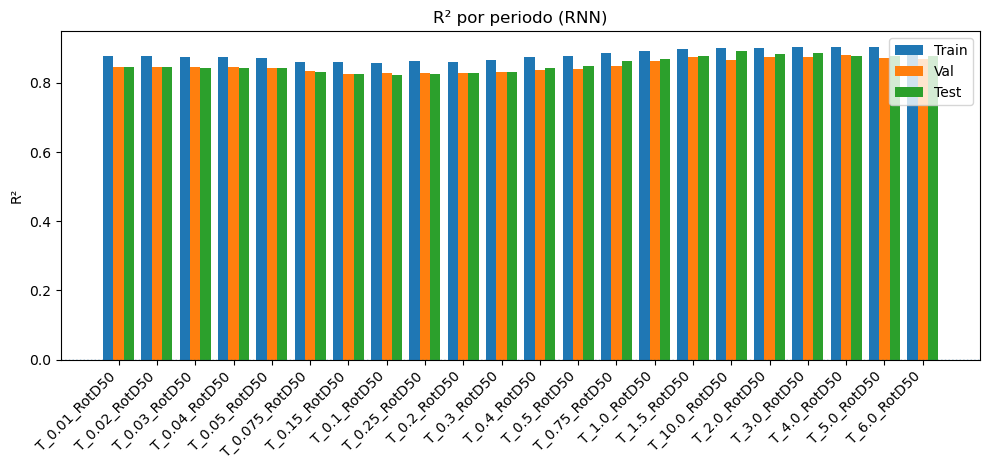

In [56]:
# ====== BLOQUE 4: Barras R² por periodo ======
import matplotlib.pyplot as plt

ys = np.array(df_test_metrics_rnn.index.tolist())
x = np.arange(len(ys)); w = 0.27

plt.figure(figsize=(10, 4.8))
plt.bar(x - w, df_train_metrics_rnn["R2"].values, width=w, label="Train")
plt.bar(x,      df_val_metrics_rnn["R2"].values,   width=w, label="Val")
plt.bar(x + w,  df_test_metrics_rnn["R2"].values,  width=w, label="Test")
plt.axhline(0.0, linestyle=":", linewidth=1)
plt.xticks(x, ys, rotation=45, ha="right")
plt.ylabel("R²"); plt.title("R² por periodo (RNN)")
plt.legend(); plt.tight_layout(); plt.show()

#### Recurrente Long-Short Term Memory

In [57]:
# Datos -> numpy
Xtr = np.asarray(X_train_feats, dtype="float32")
Xva = np.asarray(X_val_feats,   dtype="float32")
Xte = np.asarray(X_test_feats,  dtype="float32")

Ytr = np.asarray(y_train, dtype="float32");  Yva = np.asarray(y_val, dtype="float32");  Yte = np.asarray(y_test, dtype="float32")
if Ytr.ndim == 1: Ytr = Ytr.reshape(-1,1)
if Yva.ndim == 1: Yva = Yva.reshape(-1,1)
if Yte.ndim == 1: Yte = Yte.reshape(-1,1)

n_features = Xtr.shape[1]
nT = Ytr.shape[1]

# RNN input shape: (batch, timesteps, features) — tratamos cada columna como timestep
Xtr_rnn = Xtr.reshape((-1, n_features, 1))
Xva_rnn = Xva.reshape((-1, n_features, 1))
Xte_rnn = Xte.reshape((-1, n_features, 1))

tf.keras.utils.set_random_seed(42)

inp = Input(shape=(n_features, 1))
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(inp)
x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.15)(x)
out = layers.Dense(nT, activation=None)(x)

modelLSTM = Model(inp, out)
modelLSTM.compile(optimizer=optimizers.Adam(1e-3), loss=masked_mse)

es  = callbacks.EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)
rlr = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=8, min_lr=1e-6)

history = modelLSTM.fit(
    Xtr_rnn, Ytr,
    validation_data=(Xva_rnn, Yva),
    epochs=400, batch_size=64,
    callbacks=[es, rlr], verbose=1
)

print("Test loss:", modelLSTM.evaluate(Xte_rnn, Yte, verbose=0))
y_pred_test = modelLSTM.predict(Xte_rnn)   # (n_samples, nT)

Epoch 1/400
112/112 [==============================] - 7s 23ms/step - loss: 6.5228 - val_loss: 2.7996 - lr: 0.0010
Epoch 2/400
112/112 [==============================] - 2s 19ms/step - loss: 2.3182 - val_loss: 0.8874 - lr: 0.0010
Epoch 3/400
112/112 [==============================] - 3s 23ms/step - loss: 1.0338 - val_loss: 0.7370 - lr: 0.0010
Epoch 4/400
112/112 [==============================] - 3s 22ms/step - loss: 0.9434 - val_loss: 0.7068 - lr: 0.0010
Epoch 5/400
112/112 [==============================] - 2s 22ms/step - loss: 0.8823 - val_loss: 0.7527 - lr: 0.0010
Epoch 6/400
112/112 [==============================] - 2s 22ms/step - loss: 0.8526 - val_loss: 0.6821 - lr: 0.0010
Epoch 7/400
112/112 [==============================] - 2s 22ms/step - loss: 0.8290 - val_loss: 0.6769 - lr: 0.0010
Epoch 8/400
112/112 [==============================] - 2s 20ms/step - loss: 0.8038 - val_loss: 0.6911 - lr: 0.0010
Epoch 9/400
112/112 [==============================] - 2s 22ms/step - loss: 0.79

In [58]:
# ====== BLOQUE 2: Métricas por periodo (TEST) ======

# Nombres de salidas: usa tu lista de columnas objetivo
y_names = list(Sa_Crustal) if 'Sa_Crustal' in globals() else [f"Y_{j}" for j in range(Yte.shape[1])]
if len(y_names) != Yte.shape[1]: y_names = [f"Y_{j}" for j in range(Yte.shape[1])]

# Si entrenaste en log(Sa) y quieres métricas en escala original, activa:
EXP_BACKTRANS = False

Y_te_eval  = np.exp(Yte)        if EXP_BACKTRANS else Yte
Yp_te_eval = np.exp(y_pred_test) if EXP_BACKTRANS else y_pred_test

rows_test = []
for j, name in enumerate(y_names):
    y_t = Y_te_eval[:, j]; y_p = Yp_te_eval[:, j]
    m = np.isfinite(y_t) & np.isfinite(y_p)
    if m.sum() == 0:
        rows_test.append({"Y": name, "RMSE": np.nan, "MSE": np.nan, "MAE": np.nan, "MAPE_%": np.nan, "R2": np.nan})
        continue
    err  = y_p[m] - y_t[m]
    mse  = np.mean(err**2)
    rmse = np.sqrt(mse)
    mae  = np.mean(np.abs(err))
    mm   = (np.abs(y_t) > 1e-12) & m
    mape = np.mean(np.abs((y_p[mm] - y_t[mm]) / y_t[mm])) * 100.0 if mm.sum() else np.nan
    y_mean = np.mean(y_t[m])
    ss_res = np.sum((y_t[m] - y_p[m])**2)
    ss_tot = np.sum((y_t[m] - y_mean)**2)
    r2 = 1.0 - ss_res / (ss_tot + 1e-12)
    rows_test.append({"Y": name, "RMSE": rmse, "MSE": mse, "MAE": mae, "MAPE_%": mape, "R2": r2})

df_test_metrics_lstm = pd.DataFrame(rows_test).set_index("Y").sort_index()
df_test_metrics_lstm 


,RMSE,MSE,MAE,MAPE_%,R2
Y,,,,,
T_0.01_RotD50,0.669334,0.448007,0.517472,17.262697,0.842460
T_0.02_RotD50,0.670461,0.449518,0.518683,16.928107,0.842521
T_0.03_RotD50,0.674486,0.454931,0.522626,17.090248,0.841889
T_0.04_RotD50,0.679455,0.461659,0.526706,19.278400,0.840367
T_0.05_RotD50,0.685243,0.469557,0.531918,20.071699,0.839326
T_0.075_RotD50,0.719027,0.516999,0.559739,26.605511,0.825941
T_0.15_RotD50,0.726789,0.528223,0.563277,41.151261,0.821295
T_0.1_RotD50,0.733614,0.538189,0.571438,32.246390,0.818940
T_0.25_RotD50,0.721366,0.520369,0.568125,51.370543,0.825194


In [59]:
# ====== BLOQUE 3: Tres DataFrames (TRAIN / VAL / TEST) ======
y_pred_train = modelLSTM.predict(Xtr_rnn)
y_pred_val   = modelLSTM.predict(Xva_rnn)

Y_tr_eval  = np.exp(Ytr)          if EXP_BACKTRANS else Ytr
Y_va_eval  = np.exp(Yva)          if EXP_BACKTRANS else Yva
Y_te_eval  = np.exp(Yte)          if EXP_BACKTRANS else Yte
Yp_tr_eval = np.exp(y_pred_train) if EXP_BACKTRANS else y_pred_train
Yp_va_eval = np.exp(y_pred_val)   if EXP_BACKTRANS else y_pred_val
Yp_te_eval = np.exp(y_pred_test)  if EXP_BACKTRANS else y_pred_test

def _to_df(Y_true, Y_pred, names):
    rows = []
    for j, name in enumerate(names):
        y_t = Y_true[:, j]; y_p = Y_pred[:, j]
        m = np.isfinite(y_t) & np.isfinite(y_p)
        if m.sum() == 0:
            rows.append({"Y": name, "RMSE": np.nan, "MSE": np.nan, "MAE": np.nan, "MAPE_%": np.nan, "R2": np.nan})
            continue
        err  = y_p[m] - y_t[m]
        mse  = np.mean(err**2); rmse = np.sqrt(mse); mae = np.mean(np.abs(err))
        mm   = (np.abs(y_t) > 1e-12) & m
        mape = np.mean(np.abs((y_p[mm] - y_t[mm]) / y_t[mm])) * 100.0 if mm.sum() else np.nan
        y_mean = np.mean(y_t[m]); ss_res = np.sum((y_t[m] - y_p[m])**2); ss_tot = np.sum((y_t[m] - y_mean)**2)
        r2 = 1.0 - ss_res / (ss_tot + 1e-12)
        rows.append({"Y": name, "RMSE": rmse, "MSE": mse, "MAE": mae, "MAPE_%": mape, "R2": r2})
    return pd.DataFrame(rows).set_index("Y").sort_index()

df_train_metrics_lstm  = _to_df(Y_tr_eval, Yp_tr_eval, y_names)
df_val_metrics_lstm    = _to_df(Y_va_eval, Yp_va_eval, y_names)
df_test_metrics_lstm   = _to_df(Y_te_eval, Yp_te_eval, y_names)



48/48 [==============================] - 0s 4ms/step


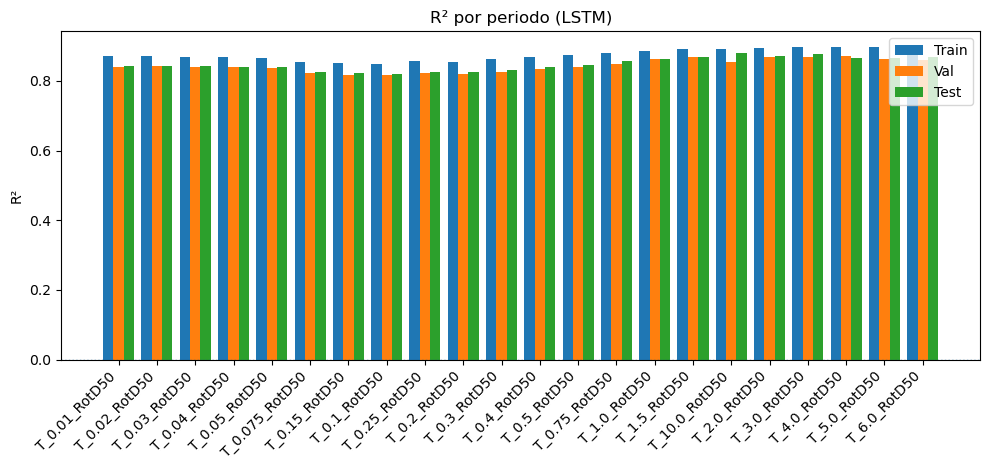

In [61]:
# ====== BLOQUE 4: Barras de R² por periodo (TRAIN / VAL / TEST) ======
import matplotlib.pyplot as plt

ys = np.array(df_test_metrics_lstm.index.tolist())
x = np.arange(len(ys)); w = 0.27

plt.figure(figsize=(10, 4.8))
plt.bar(x - w, df_train_metrics_lstm["R2"].values, width=w, label="Train")
plt.bar(x,      df_val_metrics_lstm["R2"].values,   width=w, label="Val")
plt.bar(x + w,  df_test_metrics_lstm["R2"].values,  width=w, label="Test")
plt.axhline(0.0, linestyle=":", linewidth=1)
plt.xticks(x, ys, rotation=45, ha="right")
plt.ylabel("R²"); plt.title("R² por periodo (LSTM)")
plt.legend(); plt.tight_layout(); plt.show()


### Resumen global

In [62]:
# ====== BLOQUE 1: Unificar métricas (TEST) de varios modelos en un solo DataFrame ======
import numpy as np
import pandas as pd

# SUPONE que ya tienes los DataFrames de métricas por periodo (TEST) con índice=nombre del periodo:
#   df_test_metrics_mlp
#   df_test_metrics_cnn
#   df_test_metrics_rnn   # o df_test_metrics_lstm (usa el que tengas)
#
# Si tus variables se llaman distinto, ajústalas aquí:
models = {}

if 'df_test_metrics_mlp' in globals():
    models['MLP'] = df_test_metrics_mlp.copy()
if 'df_test_metrics_cnn' in globals():
    models['CNN'] = df_test_metrics_cnn.copy()
# Usa RNN o LSTM según lo que tengas calculado:
if 'df_test_metrics_rnn' in globals():
    models['RNN'] = df_test_metrics_rnn.copy()
if 'df_test_metrics_lstm' in globals():
    models['LSTM'] = df_test_metrics_lstm.copy()

# Quedarnos solo con los periodos comunes a TODOS los modelos para comparación justa
common_Ys = None
for name, dfm in models.items():
    common_Ys = set(dfm.index) if common_Ys is None else (common_Ys & set(dfm.index))
common_Ys = sorted(list(common_Ys))

# Concatenar en formato largo
long_rows = []
for name, dfm in models.items():
    sub = dfm.loc[common_Ys, ['RMSE','MSE','MAE','MAPE_%','R2']].copy()
    sub['model'] = name
    sub['Y'] = sub.index
    long_rows.append(sub.reset_index(drop=True))
df_all = pd.concat(long_rows, ignore_index=True)

# (Opcional) ordenar por Y y modelo
df_all = df_all.sort_values(['Y','model']).reset_index(drop=True)

df_all  # columnas: ['RMSE','MSE','MAE','MAPE_%','R2','model','Y']


,RMSE,MSE,MAE,MAPE_%,R2,model,Y
0,0.698014,0.487223,0.544837,17.551971,0.828670,CNN,T_0.01_RotD50
1,0.669334,0.448007,0.517472,17.262697,0.842460,LSTM,T_0.01_RotD50
2,0.684758,0.468893,0.537110,18.109019,0.835116,MLP,T_0.01_RotD50
3,0.664197,0.441158,0.515871,17.250478,0.844869,RNN,T_0.01_RotD50
4,0.698728,0.488221,0.544655,17.320108,0.828962,CNN,T_0.02_RotD50
...,...,...,...,...,...,...,...
83,0.687410,0.472532,0.540232,10.312716,0.877483,RNN,T_5.0_RotD50
84,0.732917,0.537168,0.580140,10.741602,0.861485,CNN,T_6.0_RotD50
85,0.715649,0.512153,0.555467,10.193252,0.867936,LSTM,T_6.0_RotD50
86,0.735941,0.541610,0.576256,10.826514,0.860340,MLP,T_6.0_RotD50


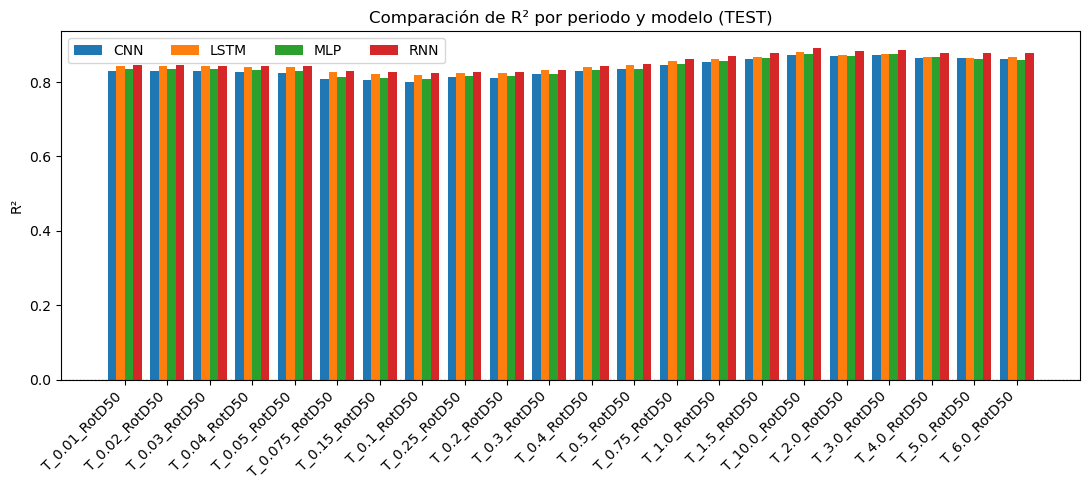

In [63]:
# ====== BLOQUE 2: Barras agrupadas (R2) por periodo y por modelo ======
import numpy as np
import matplotlib.pyplot as plt

ys = sorted(df_all['Y'].unique().tolist())
mods = sorted(df_all['model'].unique().tolist())

x = np.arange(len(ys))
w = 0.8 / max(1, len(mods))  # ancho de barra adaptativo

plt.figure(figsize=(max(10, len(ys)*0.5), 5))

for k, m in enumerate(mods):
    r2_vals = df_all[df_all['model']==m].set_index('Y').loc[ys, 'R2'].values
    plt.bar(x + (k - (len(mods)-1)/2)*w, r2_vals, width=w, label=m)

plt.axhline(0.0, linestyle=":", linewidth=1)
plt.xticks(x, ys, rotation=45, ha="right")
plt.ylabel("R²")
plt.title("Comparación de R² por periodo y modelo (TEST)")
plt.legend(ncols=min(len(mods), 4))
plt.tight_layout()
plt.show()


,RMSE,MSE,MAE,MAPE_%,R2
model,,,,,
RNN,0.693677,0.481844,0.541052,25.259038,0.853451
LSTM,0.707988,0.501952,0.552026,24.795345,0.847955
MLP,0.724037,0.524918,0.571548,27.859445,0.840703
CNN,0.730353,0.534028,0.574854,23.978481,0.837724


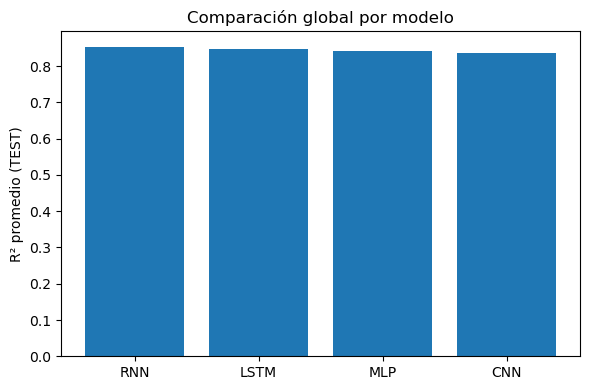

In [64]:
# ====== BLOQUE 3: Resumen global por modelo (promedios en TEST) + barras ======
summary = (
    df_all.groupby('model')[['RMSE','MSE','MAE','MAPE_%','R2']]
    .mean()
    .sort_values('R2', ascending=False)
)
display(summary)

# Barras de R2 promedio por modelo
plt.figure(figsize=(6,4))
plt.bar(summary.index, summary['R2'].values)
plt.ylabel("R² promedio (TEST)")
plt.title("Comparación global por modelo")
plt.tight_layout()
plt.show()


48/48 [==============================] - 0s 6ms/step


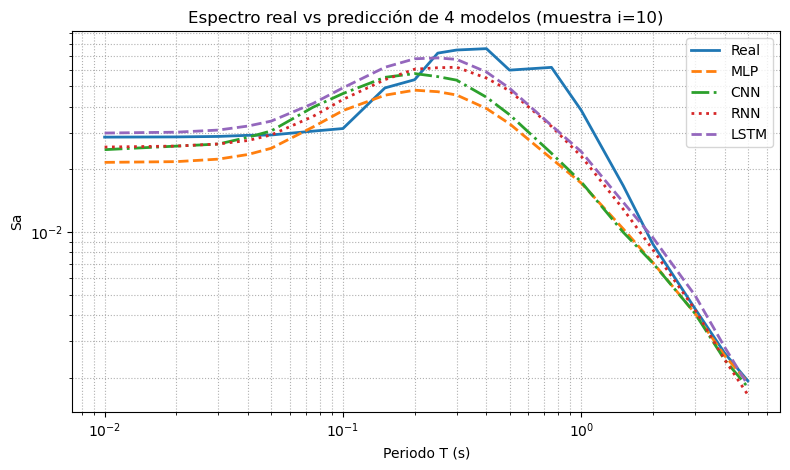

In [73]:
# --- Configuración ---
i = 10                 # índice de la muestra a graficar
EXP_BACKTRANS = False  # True si tus Y/preds están en log y quieres exponenciar

# --- Periodos a partir de los nombres en Sa_Crustal ---
periods = np.array([float(s.split('_')[1]) for s in Sa_Crustal], dtype=float)

# --- Asegurar Y_test como numpy 2D y obtener el espectro real de la muestra i ---
Y_te = np.asarray(y_test, dtype=float)
if Y_te.ndim == 1: Y_te = Y_te.reshape(-1, 1)
y_true_spec = Y_te[i]

# --- Predicciones de los 4 modelos ---
# MLP (denso)
y_pred_test_mlp = np.asarray(modelMLP.predict(X_test_feats))
if y_pred_test_mlp.ndim == 1: y_pred_test_mlp = y_pred_test_mlp.reshape(-1, 1)

# CNN
y_pred_test_cnn = np.asarray(modelCNN.predict(Xte_cnn))
if y_pred_test_cnn.ndim == 1: y_pred_test_cnn = y_pred_test_cnn.reshape(-1, 1)

# RNN (SimpleRNN)
y_pred_test_rnn = np.asarray(modelRNN.predict(Xte_rnn))
if y_pred_test_rnn.ndim == 1: y_pred_test_rnn = y_pred_test_rnn.reshape(-1, 1)

# LSTM
y_pred_test_lstm = np.asarray(modelLSTM.predict(Xte_rnn))
if y_pred_test_lstm.ndim == 1: y_pred_test_lstm = y_pred_test_lstm.reshape(-1, 1)

# --- Seleccionar la muestra i de cada predicción ---
preds = {
    "MLP":   y_pred_test_mlp[i],
    "CNN":   y_pred_test_cnn[i],
    "RNN":   y_pred_test_rnn[i],
    "LSTM":  y_pred_test_lstm[i],
}

# --- Back-transform opcional (si entrenaste en log(Sa)) ---
if EXP_BACKTRANS:
    y_true_plot = np.exp(y_true_spec)
    preds = {k: np.exp(v) for k, v in preds.items()}
else:
    y_true_plot = y_true_spec

# --- Máscara de válidos según el real ---
mask = np.isfinite(y_true_plot)
T = periods[mask]
y_real = y_true_plot[mask]
preds_masked = {k: v[mask] for k, v in preds.items()}

# --- Plot ---
plt.figure(figsize=(8, 4.8))
plt.plot(T, np.exp(y_real), label="Real", linewidth=2)

linestyles = {"MLP":"--", "CNN":"-.", "RNN":":", "LSTM":"--"}
for name, yhat in preds_masked.items():
    plt.plot(T, np.exp(yhat), linestyle=linestyles.get(name, "--"), linewidth=2, label=name)

# Escalas log si quieres (descomenta si aplica a tu caso)
plt.xscale("log"); plt.yscale("log")

plt.xlabel("Periodo T (s)")
plt.ylabel("Sa")
plt.title(f"Espectro real vs predicción de 4 modelos (muestra i={i})")
plt.grid(True, which="both", linestyle=":")
plt.legend()
plt.tight_layout()
plt.show()
